In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
dataset = load_breast_cancer()

In [5]:
df = pd.DataFrame(dataset.data, columns = dataset['feature_names'])

In [6]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789
349,11.95,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,0.2459,0.06581,...,12.81,17.72,83.09,496.2,0.1293,0.18850,0.03122,0.04766,0.3124,0.07590
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,...,15.33,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.17370,0.13620,0.08178,0.2487,0.06766
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263


In [7]:
df['target'] = dataset['target']

In [8]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
62,14.25,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.1949,0.07292,...,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320,0
44,13.17,21.81,85.42,531.5,0.09714,0.1047,0.08259,0.05252,0.1746,0.06177,...,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.1607,0.3693,0.09618,0
482,13.47,14.06,87.32,546.3,0.10710,0.1155,0.05786,0.05266,0.1779,0.06639,...,18.32,94.94,660.2,0.1393,0.2499,0.1848,0.1335,0.3227,0.09326,1
512,13.40,20.52,88.64,556.7,0.11060,0.1469,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.11090,0
118,15.78,22.91,105.70,782.6,0.11550,0.1752,0.21330,0.09479,0.2096,0.07331,...,30.50,130.30,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520,0


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# EDA

In [11]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

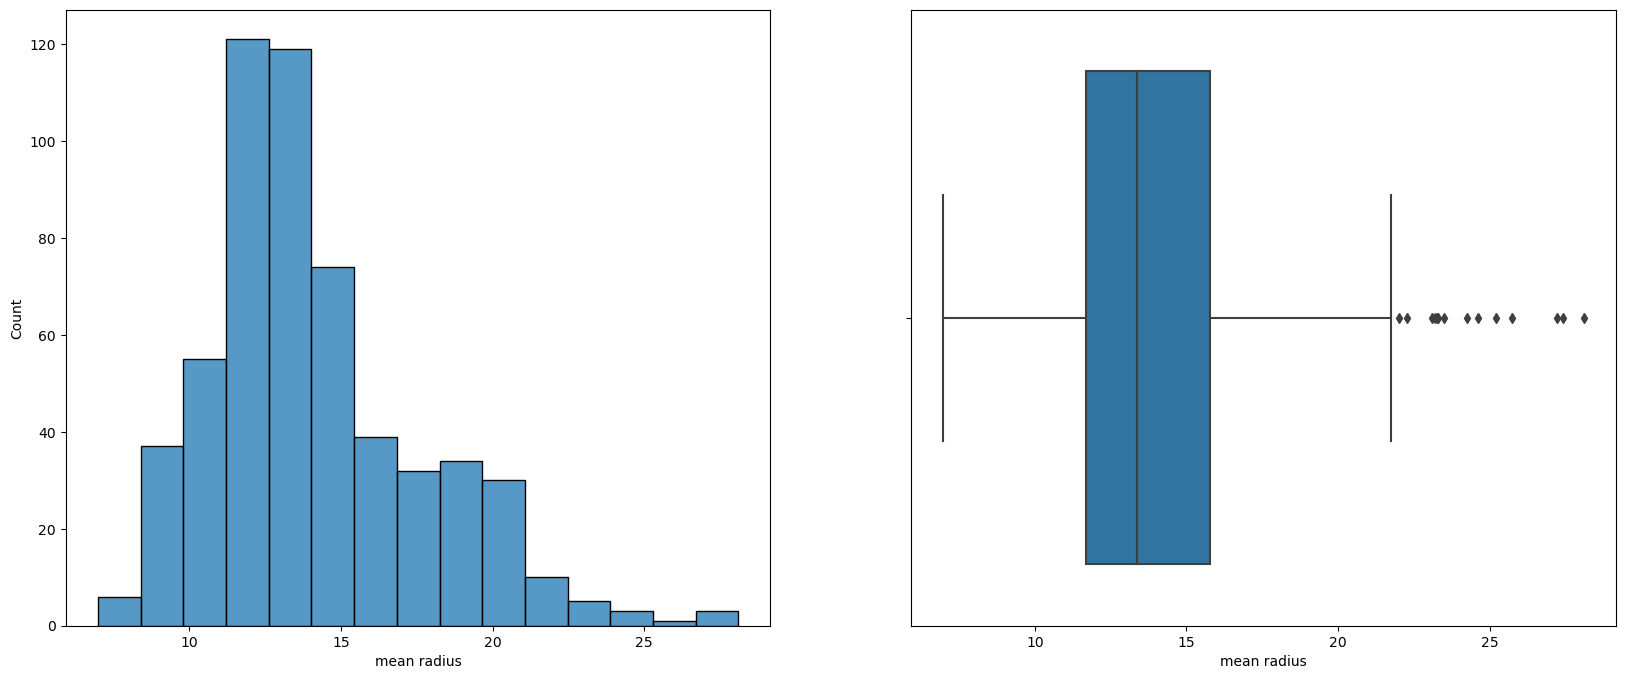

In [13]:
# Column: mean radius
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(df['mean radius'], ax=ax1, bins = 15)
sns.boxplot(x = df['mean radius'], ax = ax2)
plt.show()

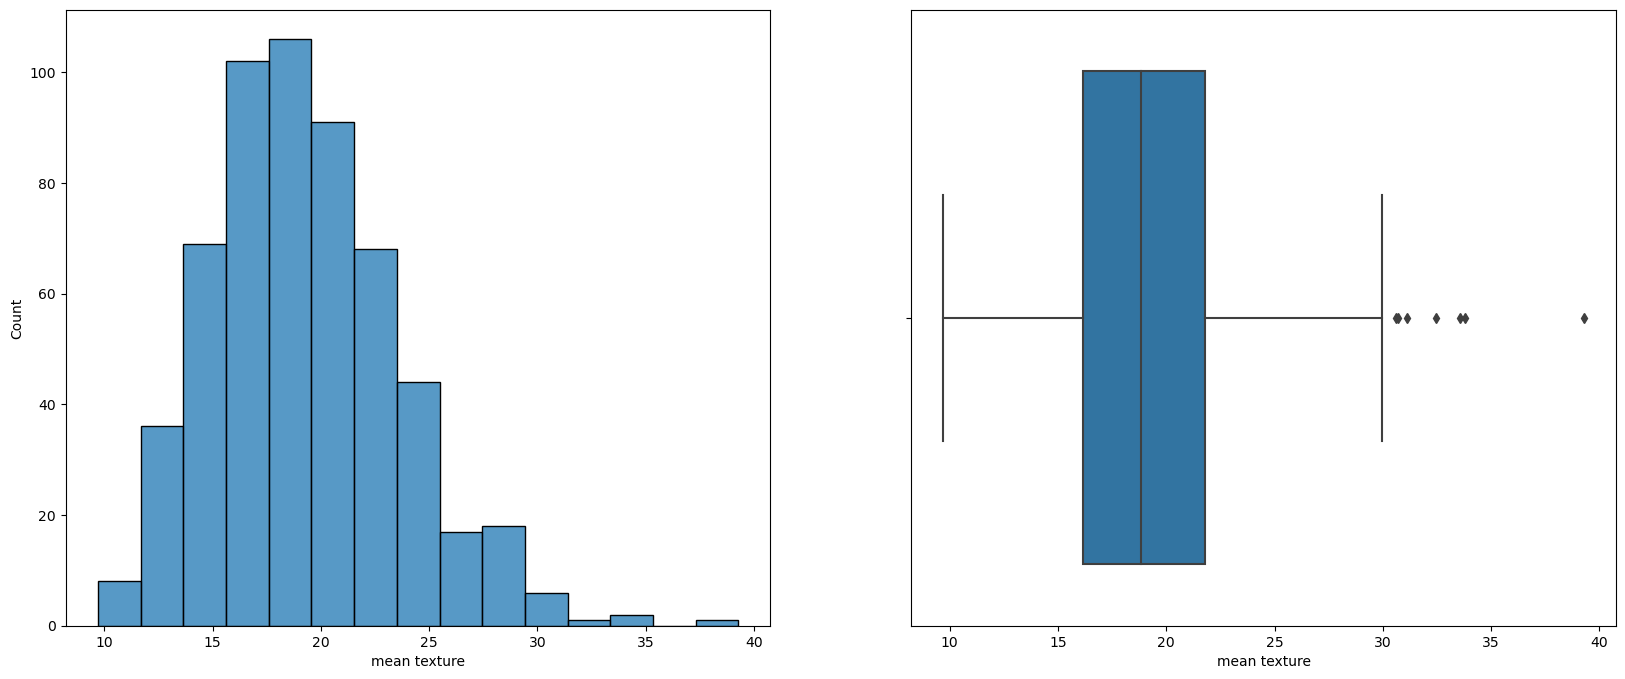

In [14]:
# Column: mean radius
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(df['mean texture'], ax=ax1, bins = 15)
sns.boxplot(x = df['mean texture'], ax = ax2)
plt.show()

In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Histogram plot and Box plot:  mean radius


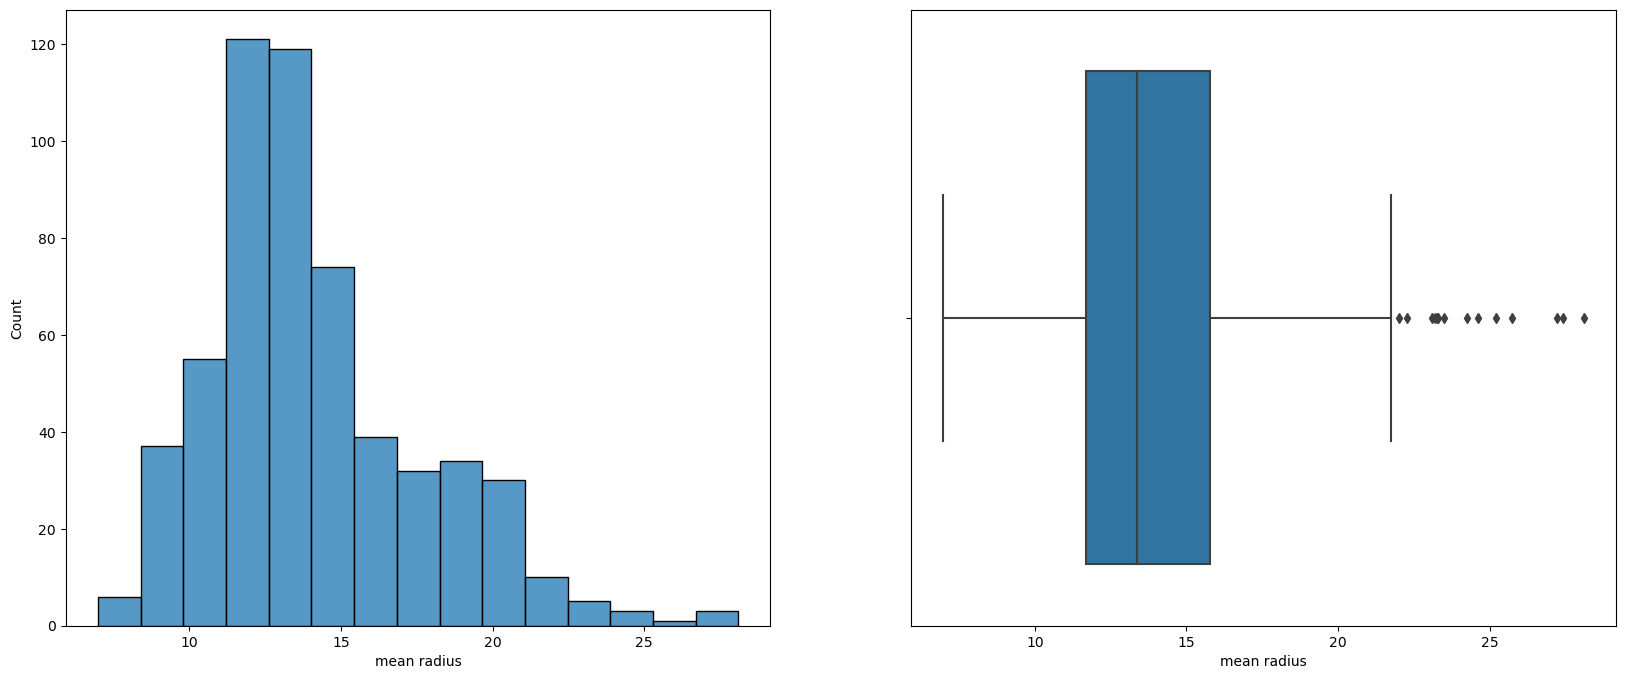

Histogram plot and Box plot:  mean texture


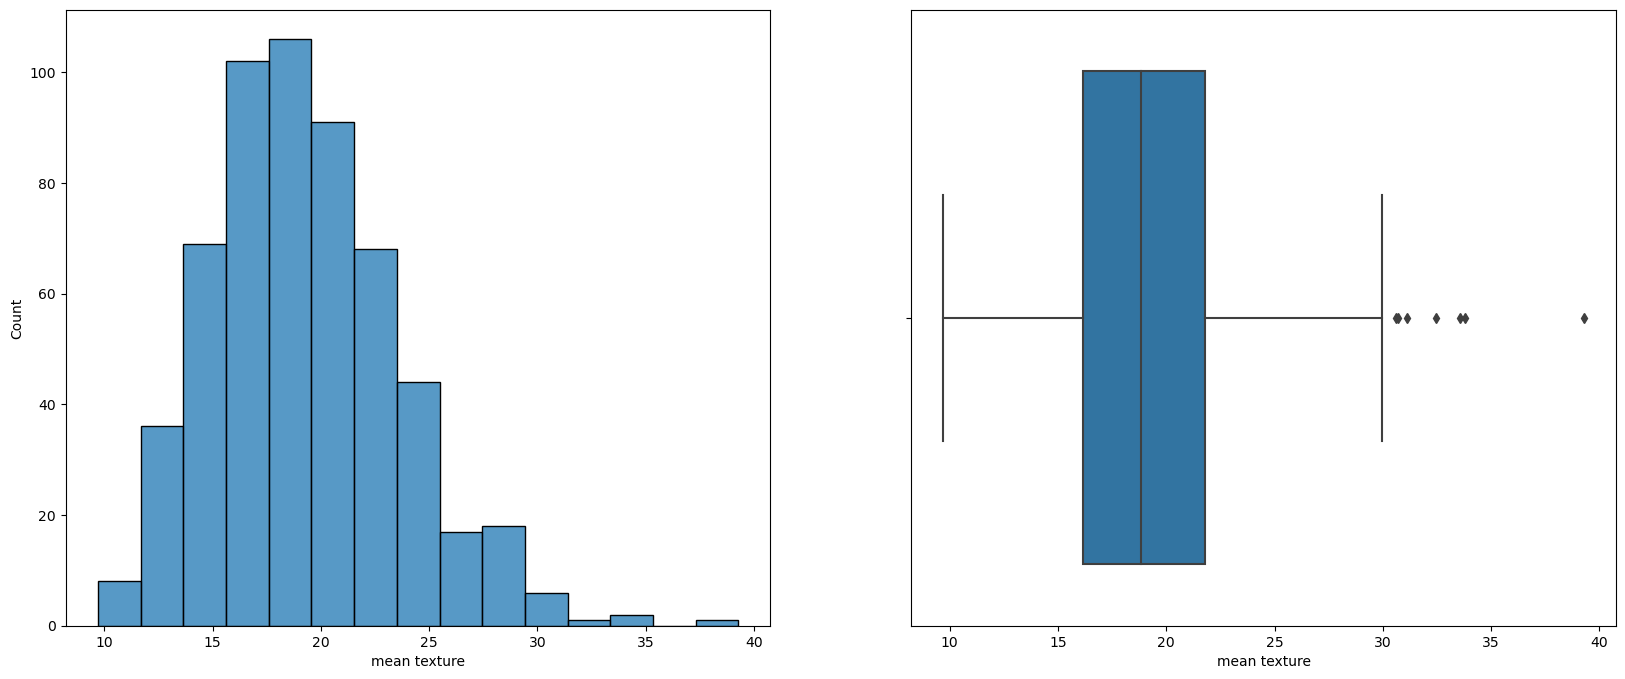

Histogram plot and Box plot:  mean perimeter


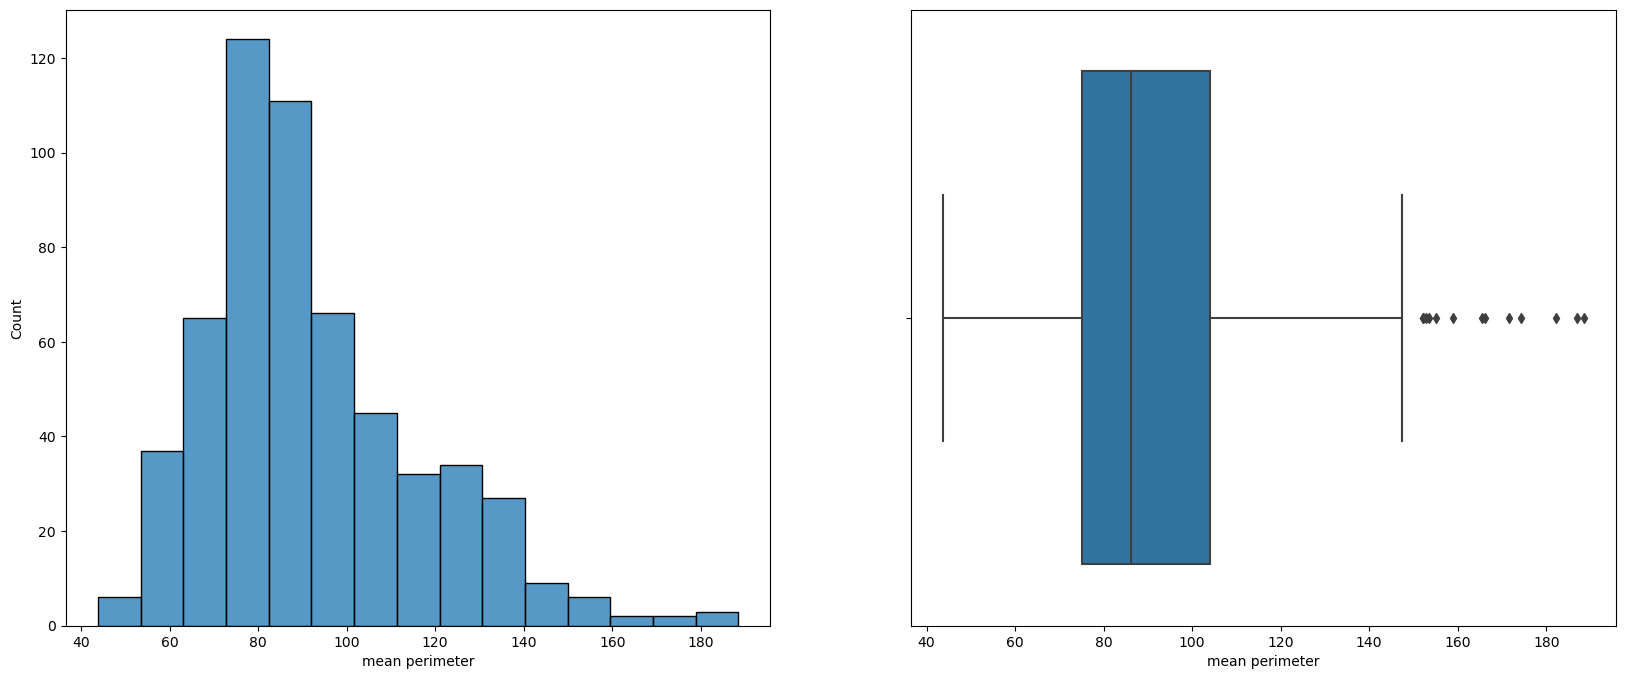

Histogram plot and Box plot:  mean area


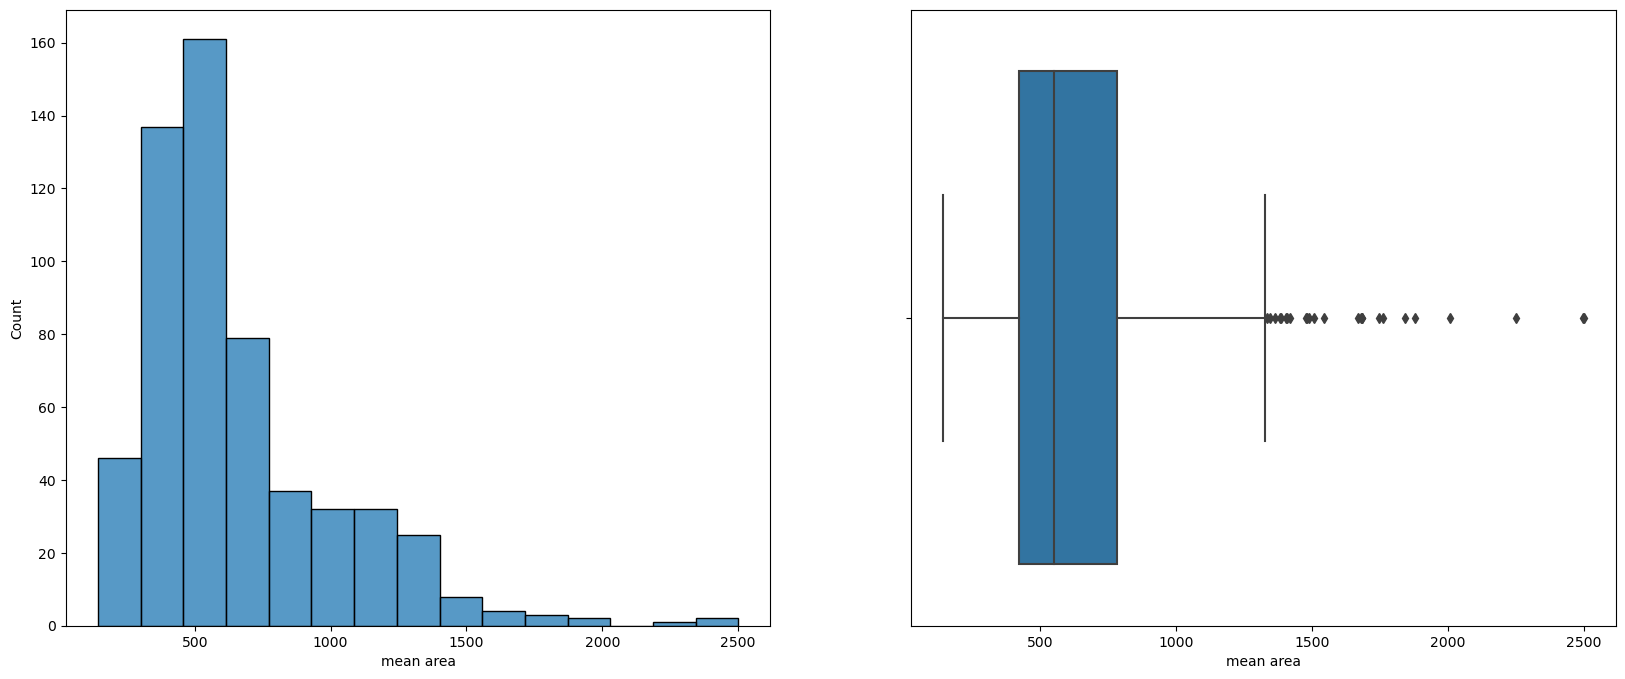

Histogram plot and Box plot:  mean smoothness


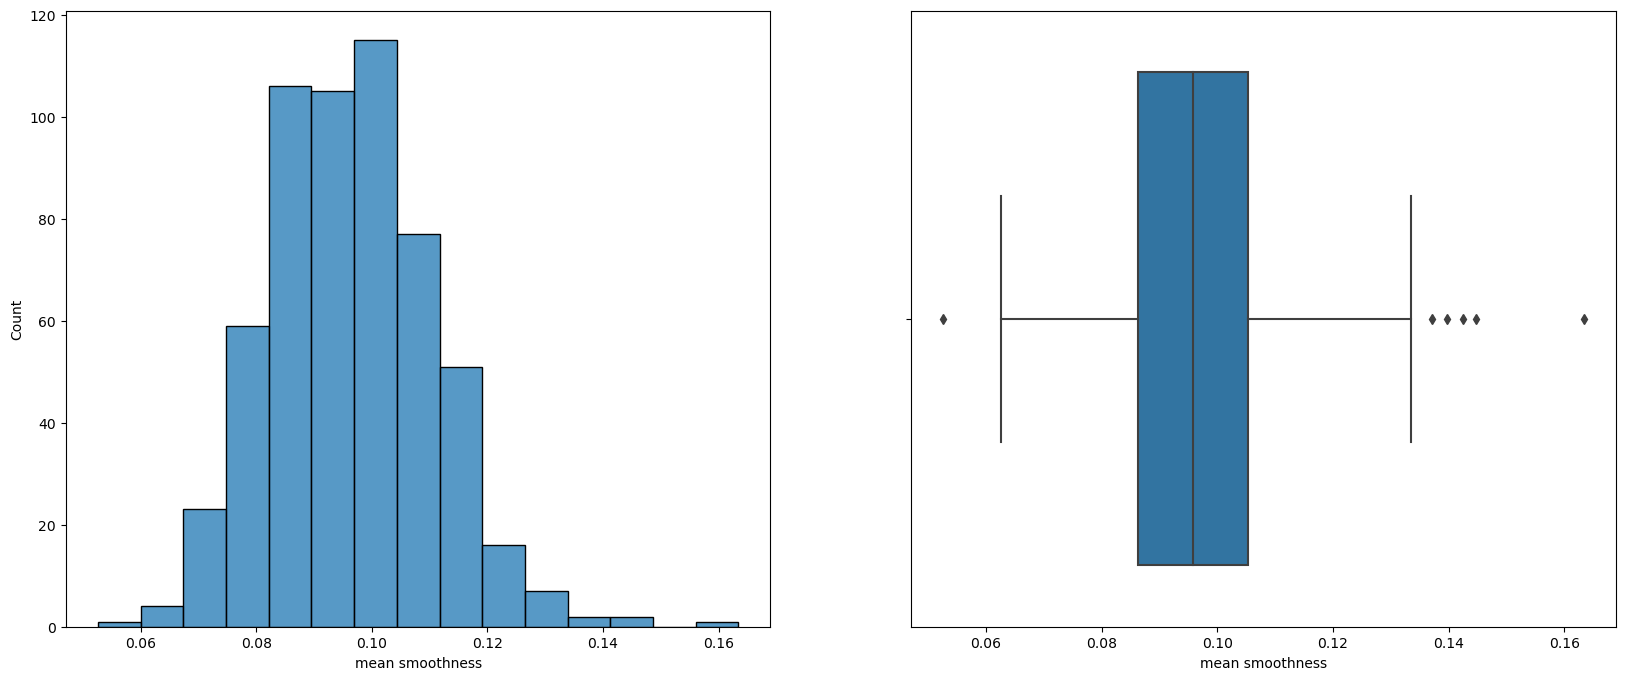

Histogram plot and Box plot:  mean compactness


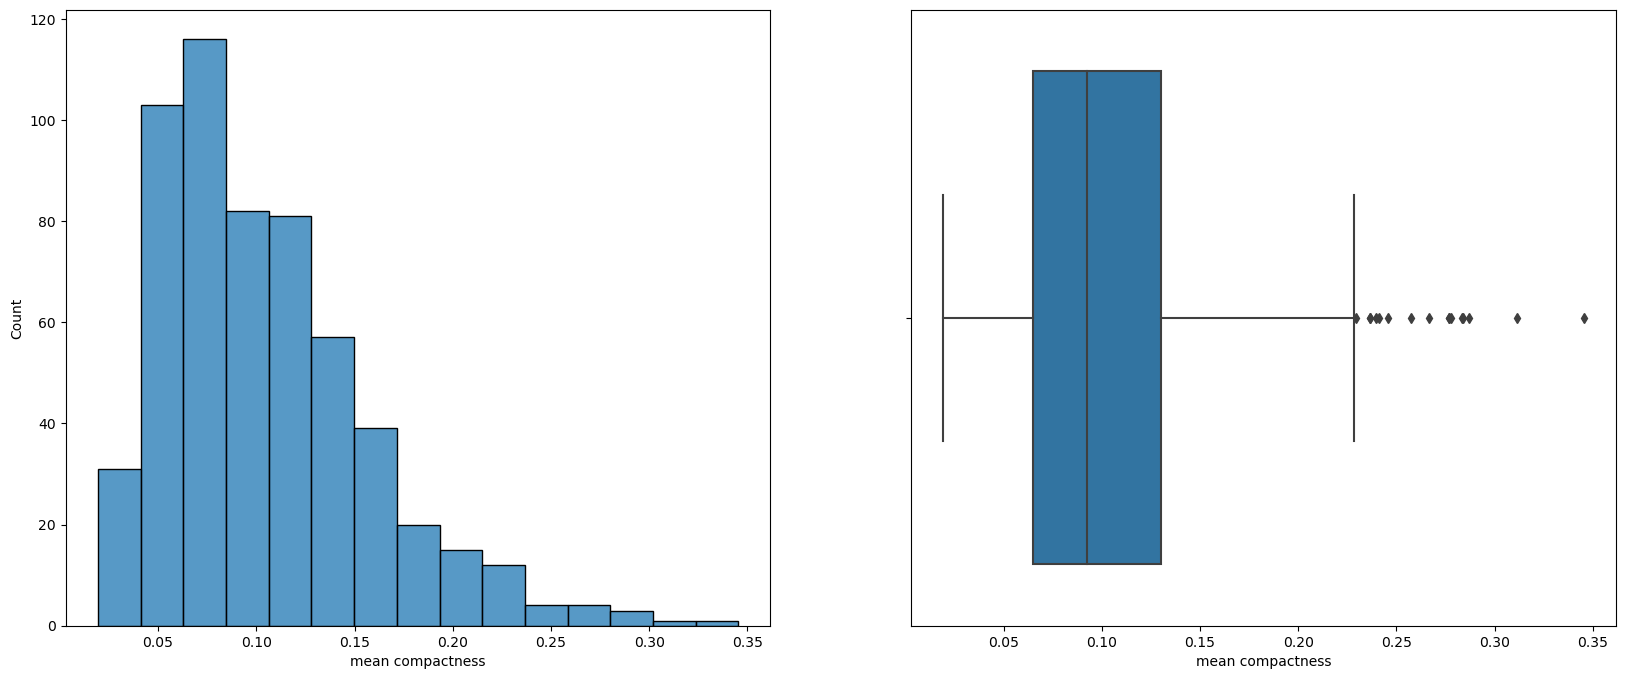

Histogram plot and Box plot:  mean concavity


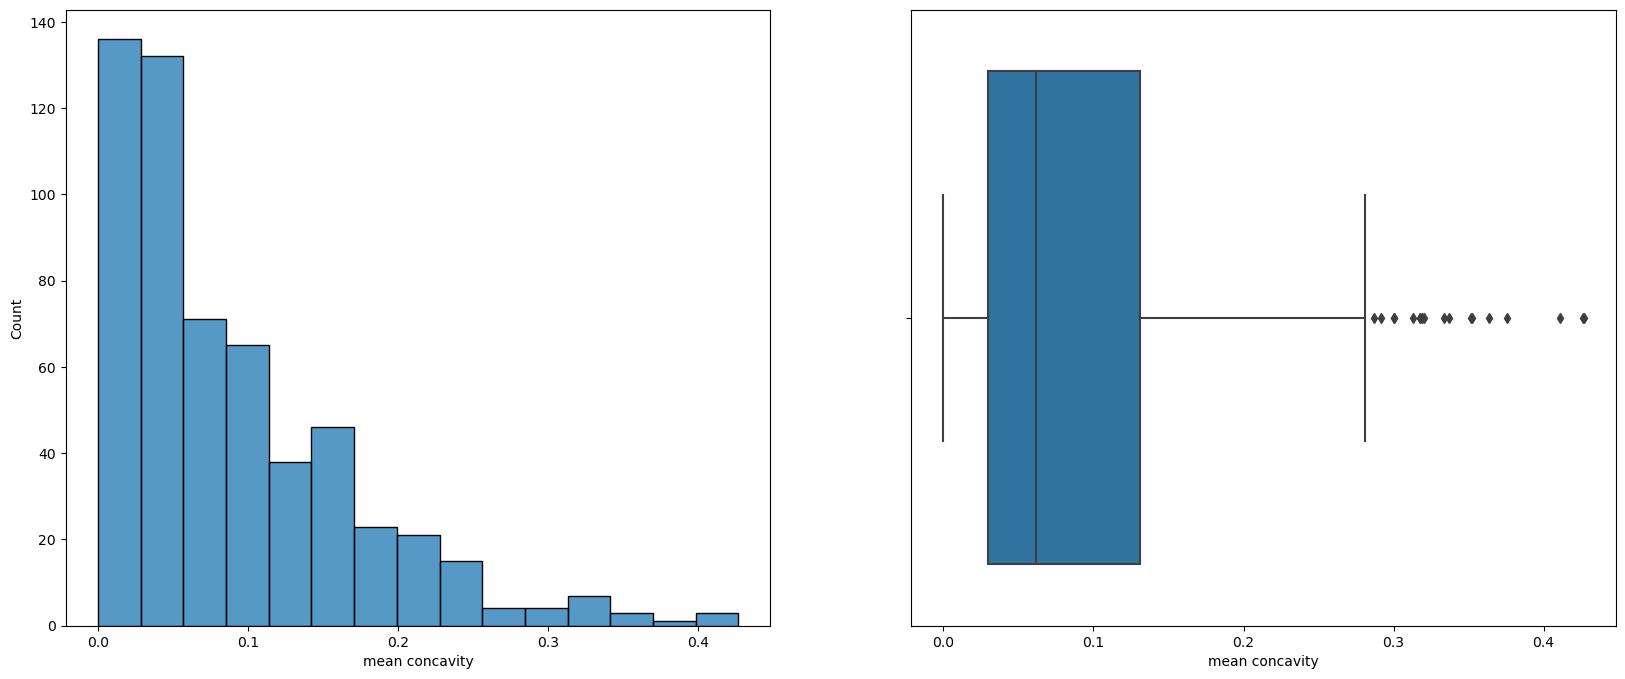

Histogram plot and Box plot:  mean concave points


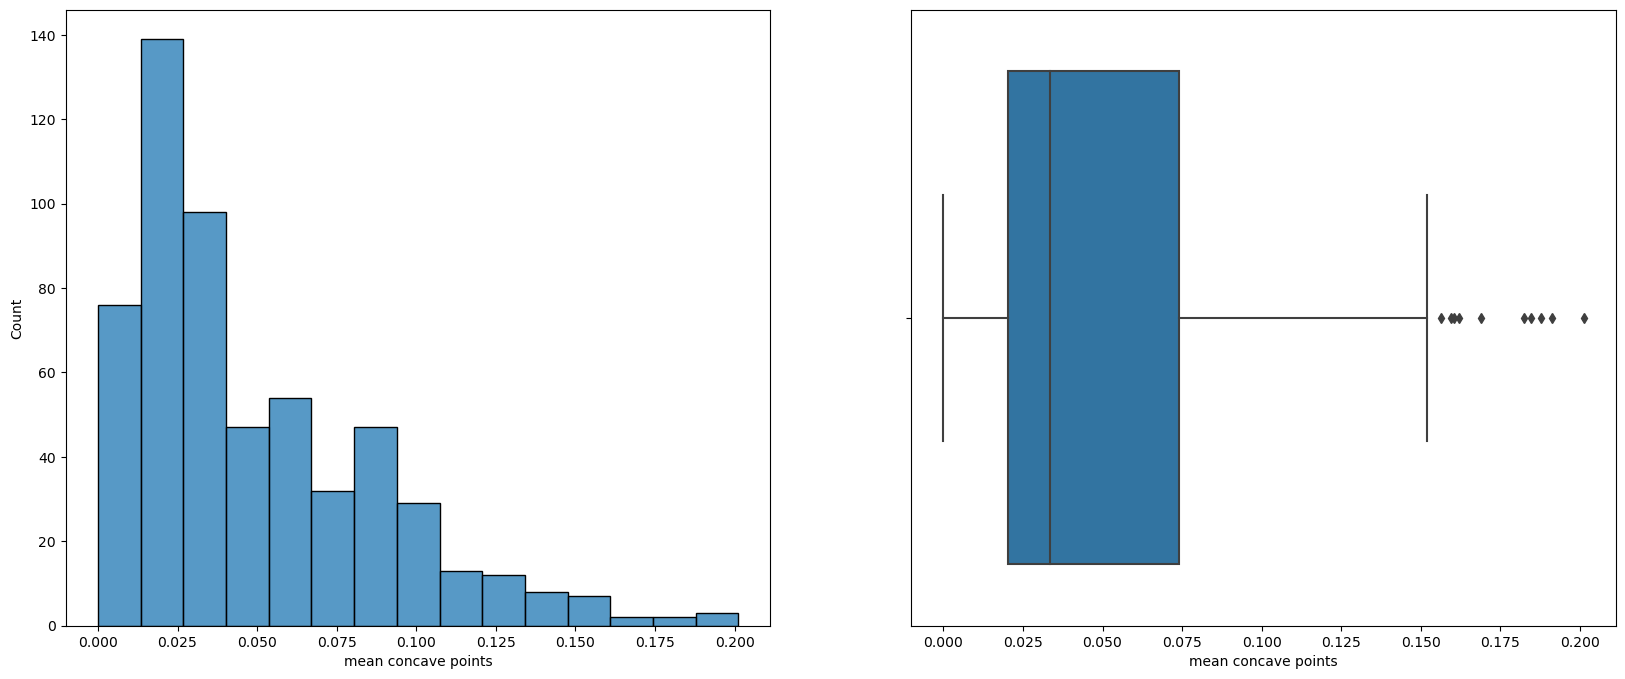

Histogram plot and Box plot:  mean symmetry


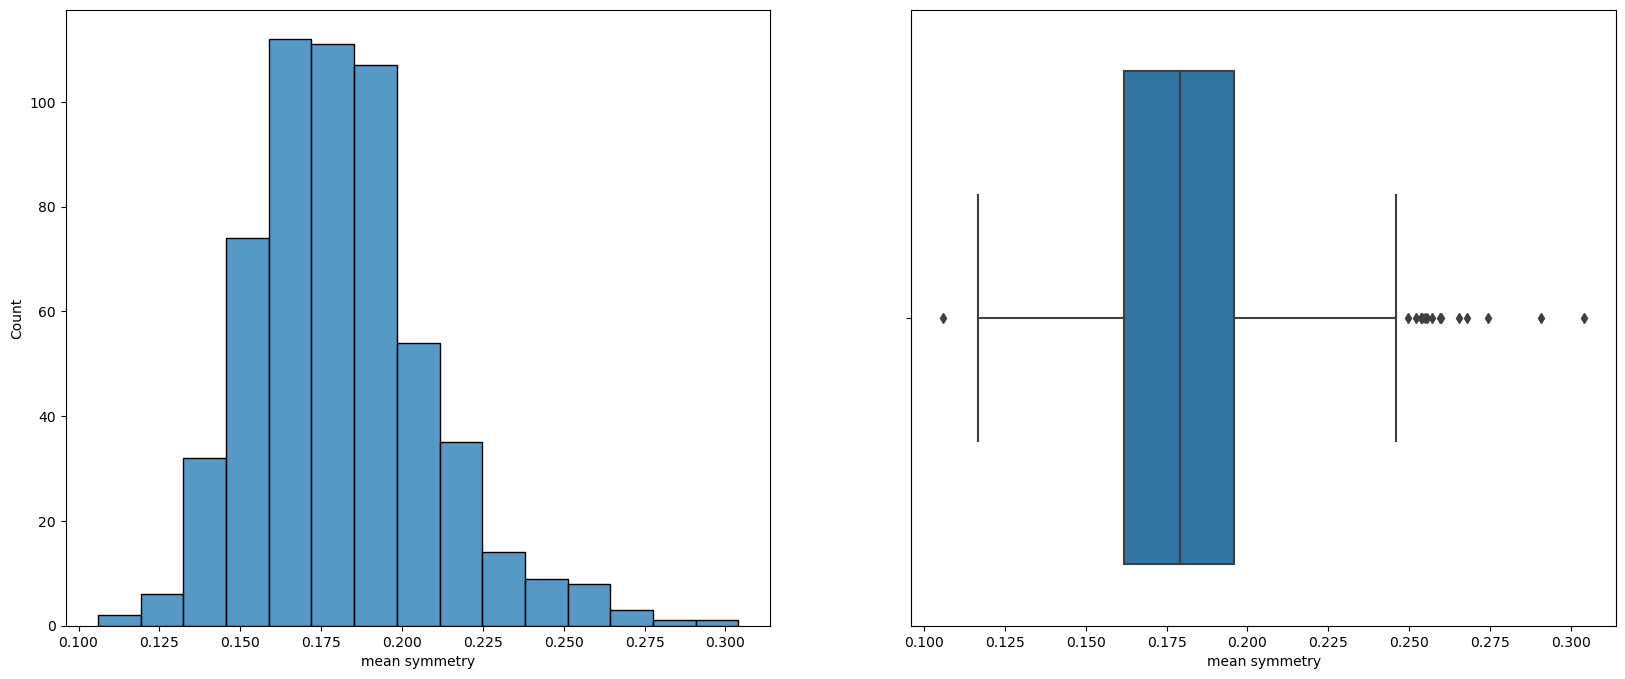

Histogram plot and Box plot:  mean fractal dimension


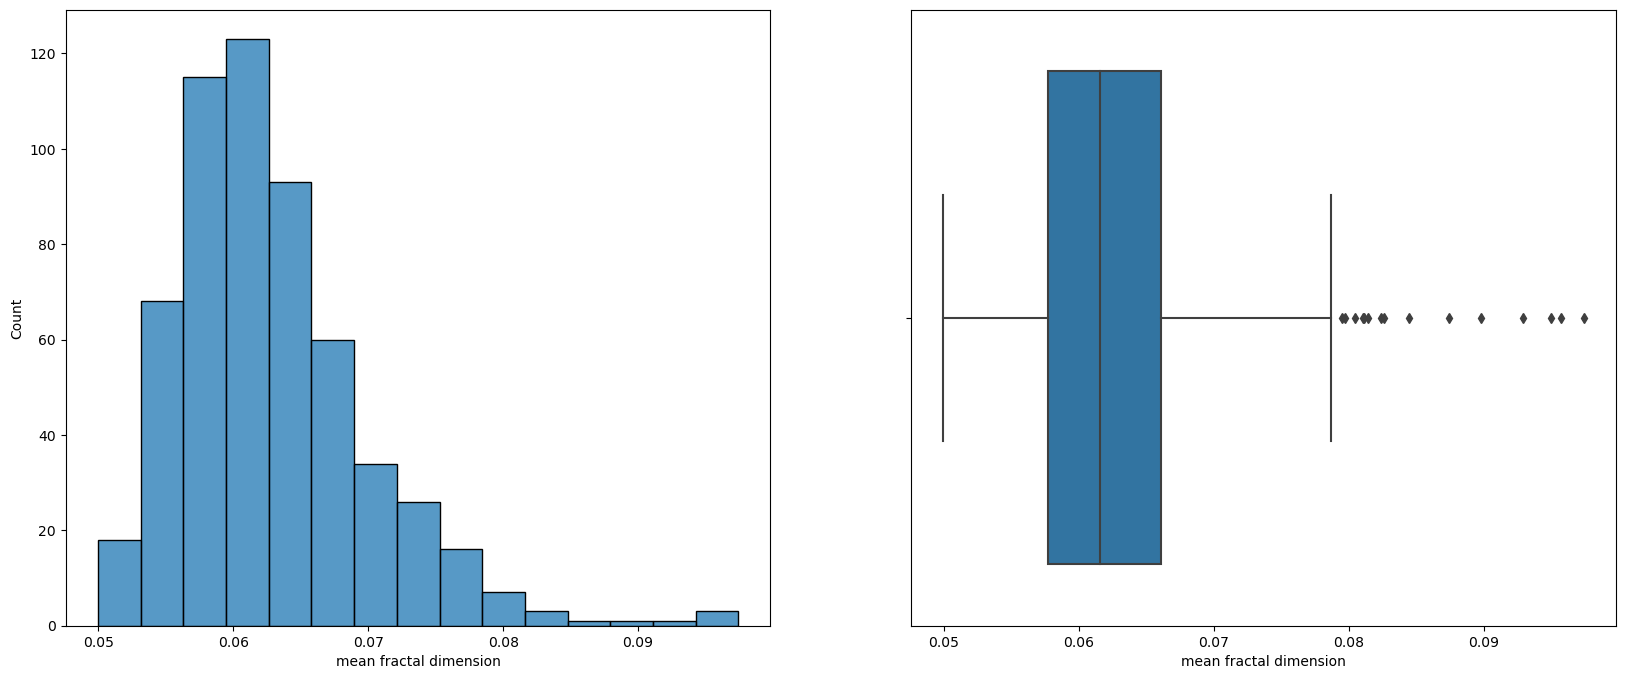

Histogram plot and Box plot:  radius error


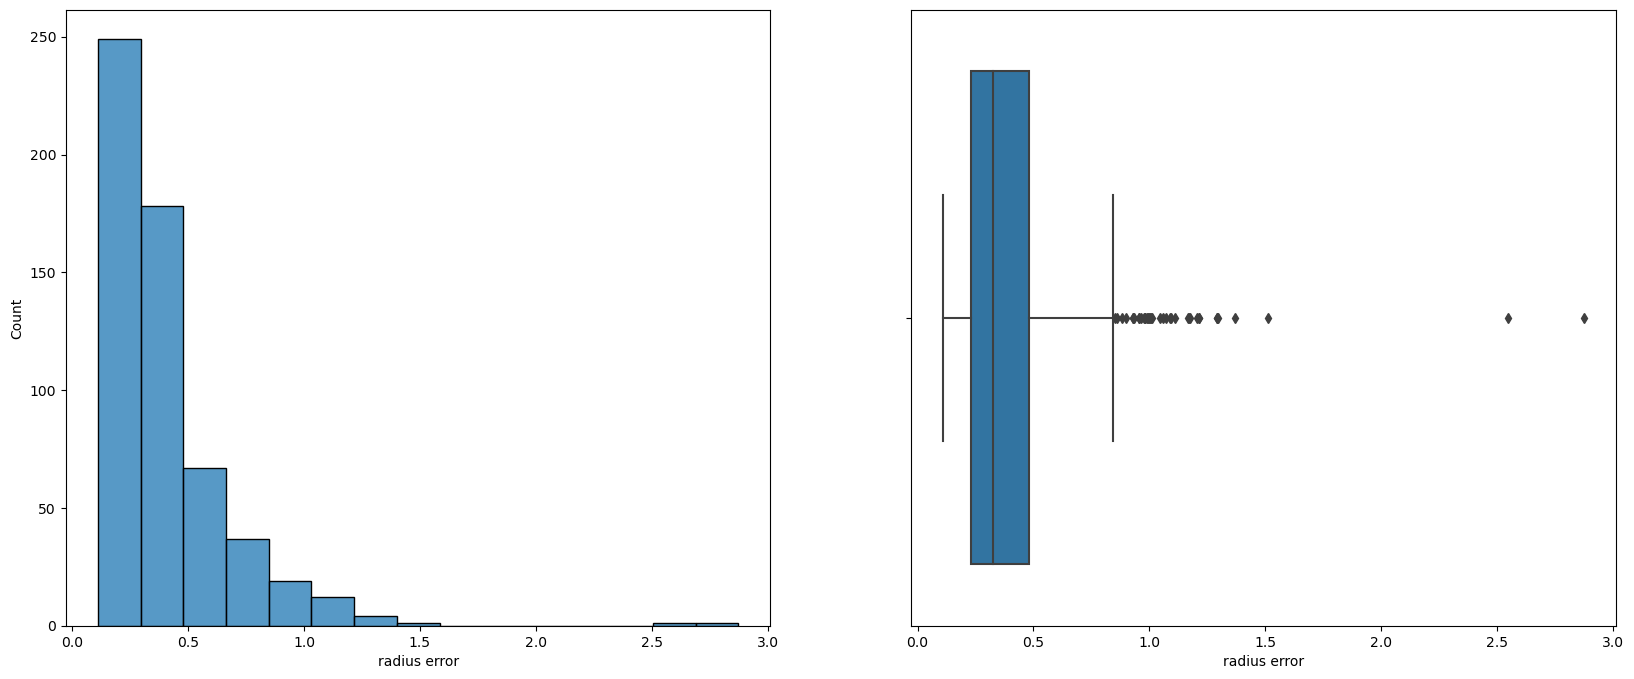

Histogram plot and Box plot:  texture error


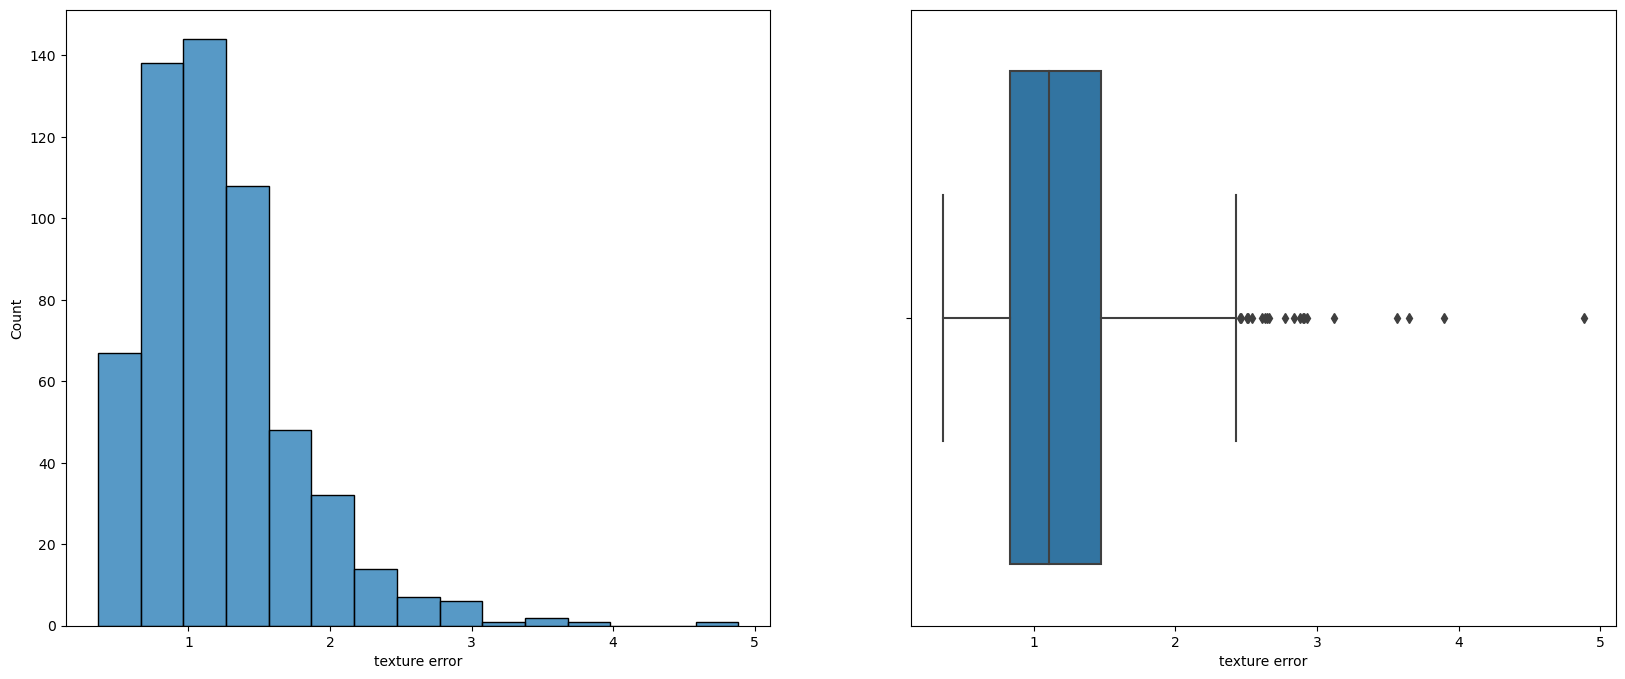

Histogram plot and Box plot:  perimeter error


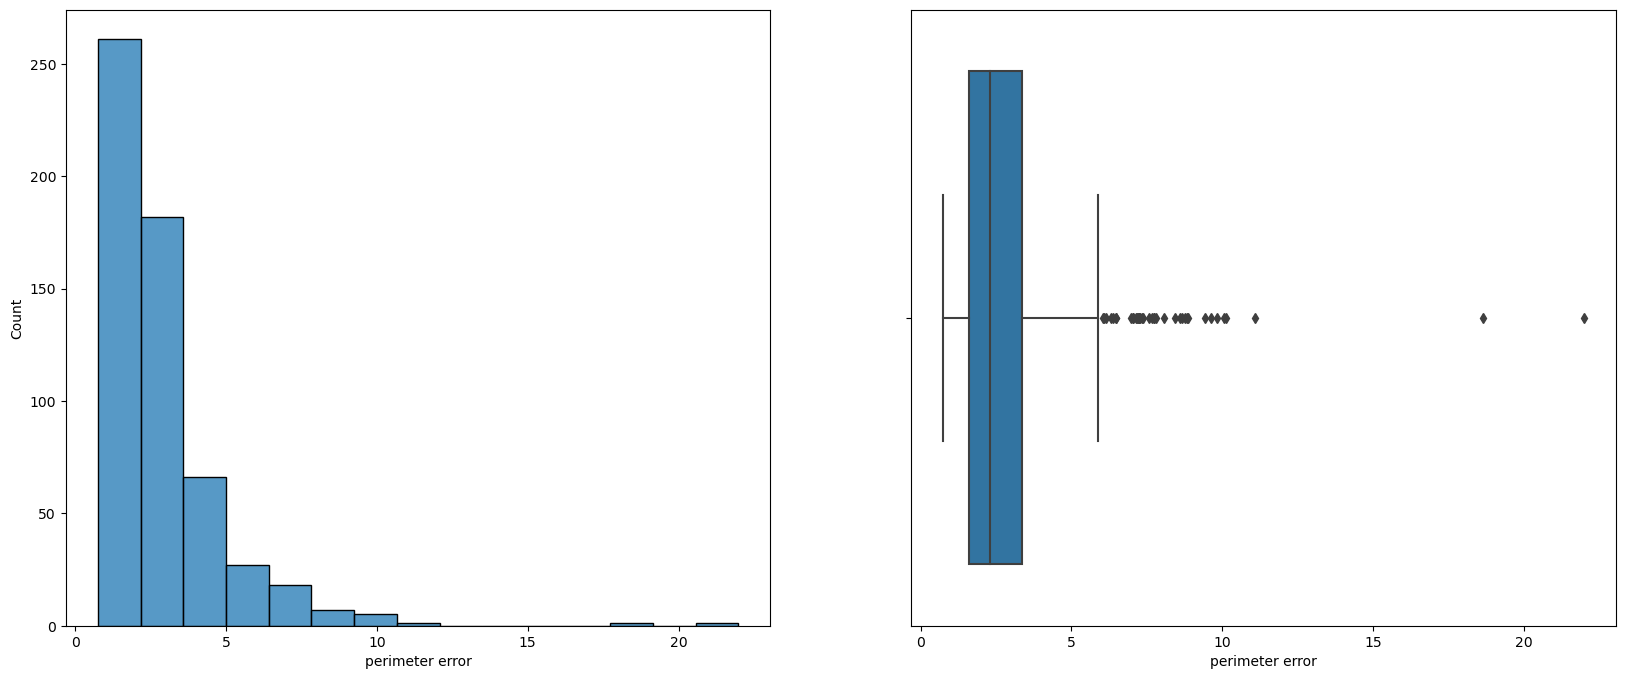

Histogram plot and Box plot:  area error


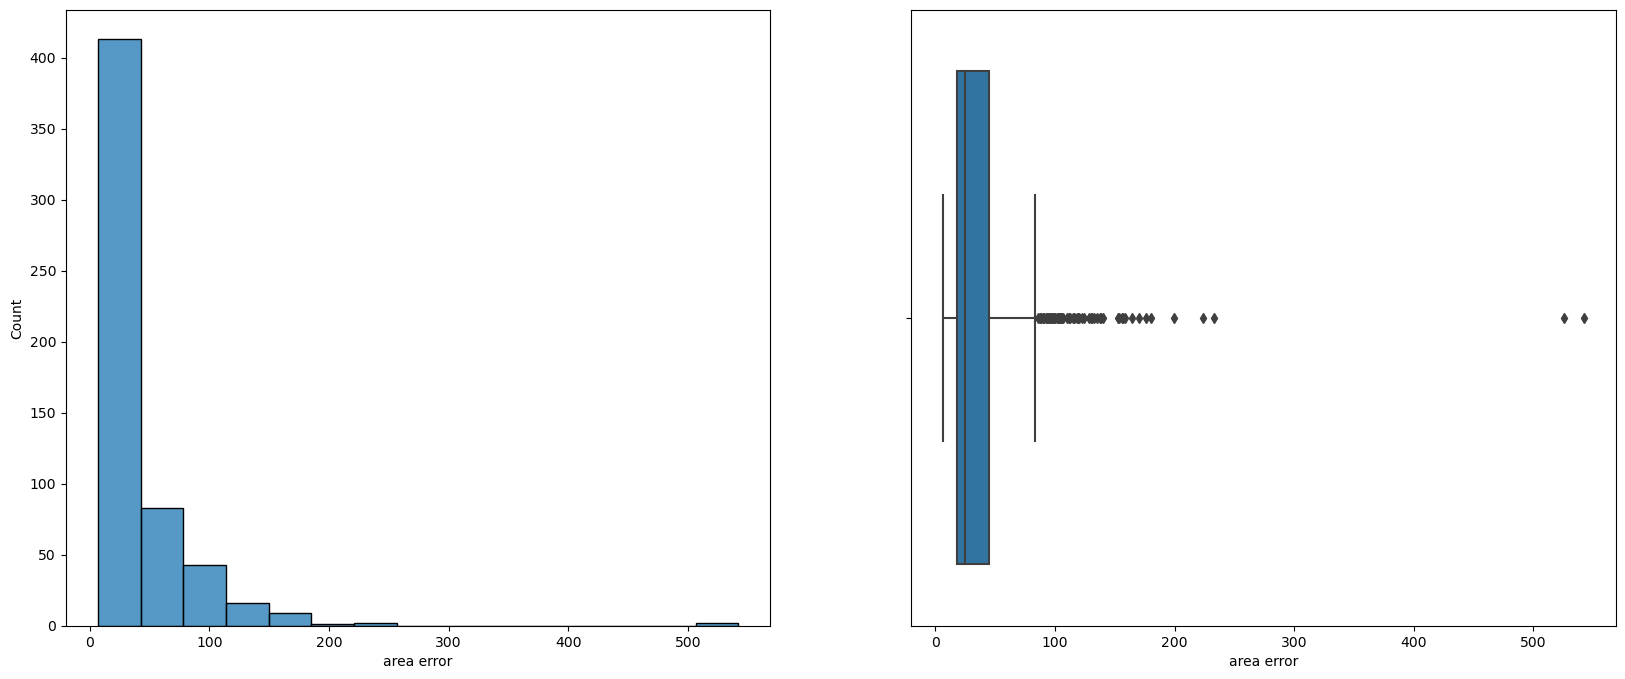

Histogram plot and Box plot:  smoothness error


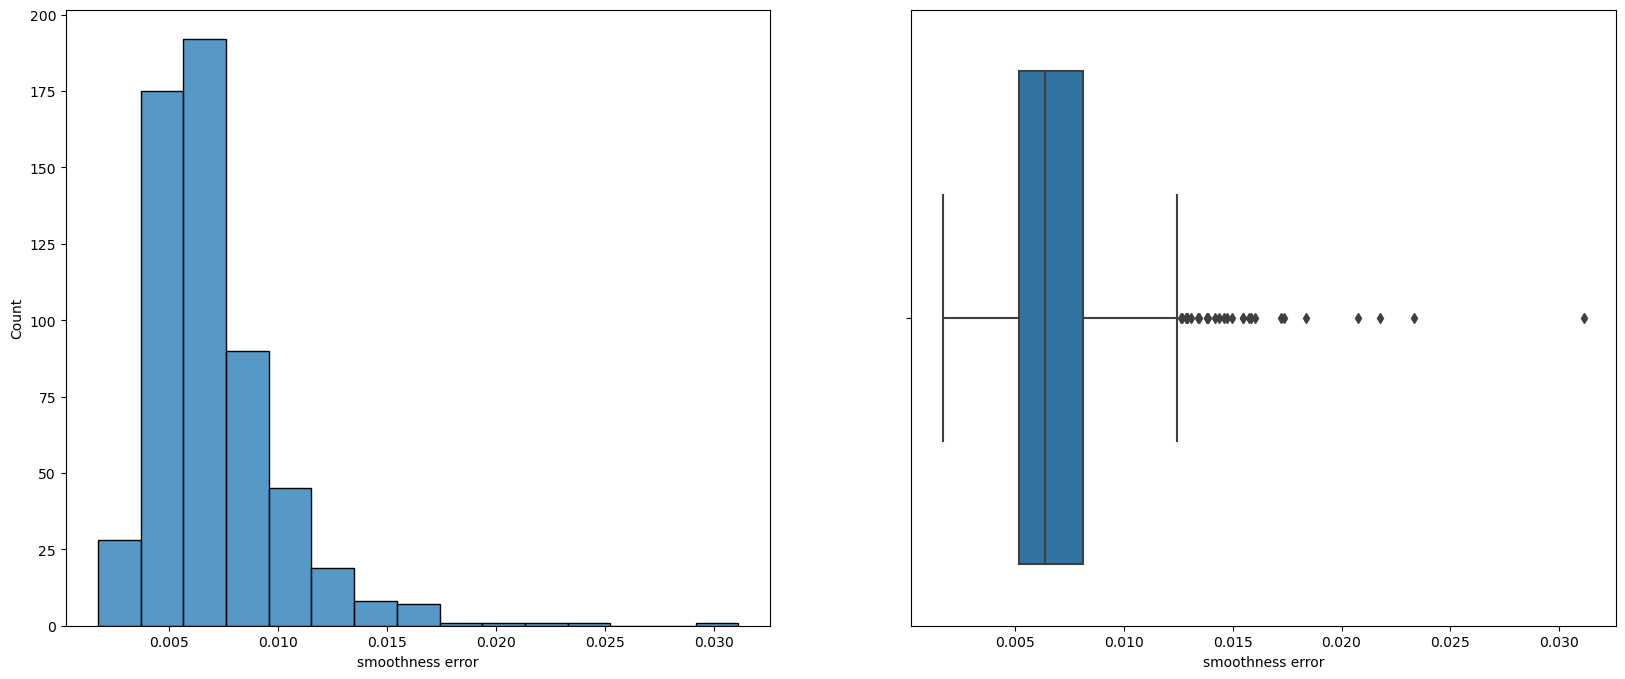

Histogram plot and Box plot:  compactness error


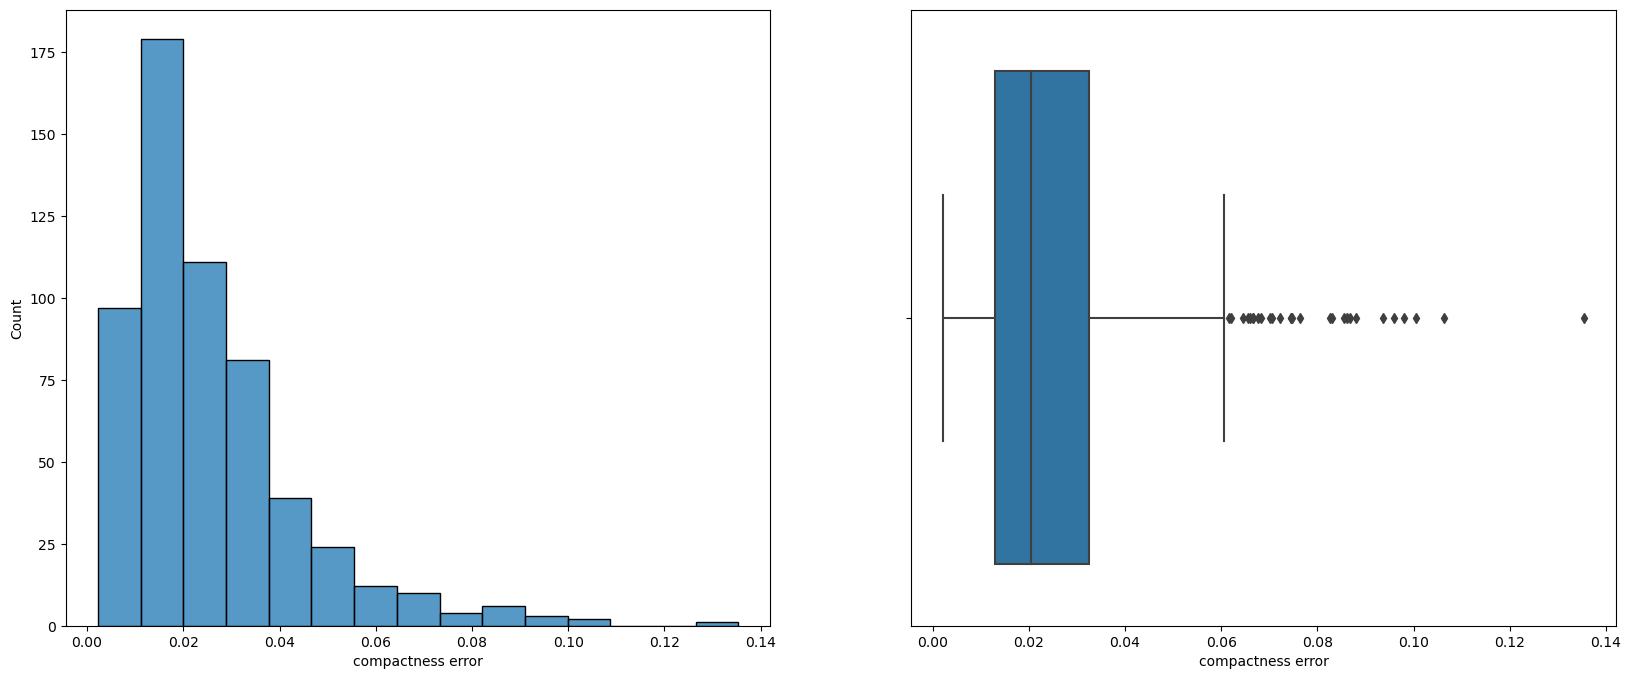

Histogram plot and Box plot:  concavity error


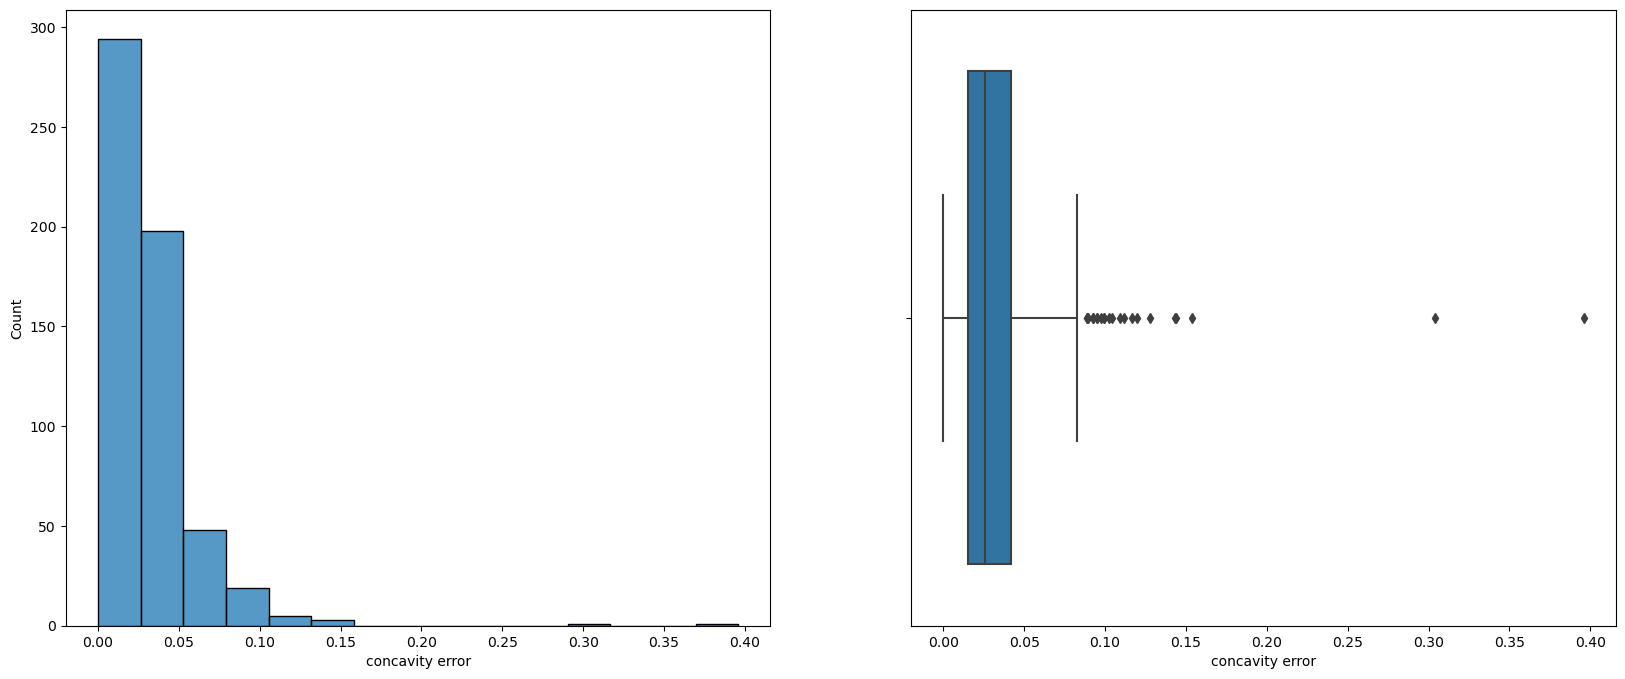

Histogram plot and Box plot:  concave points error


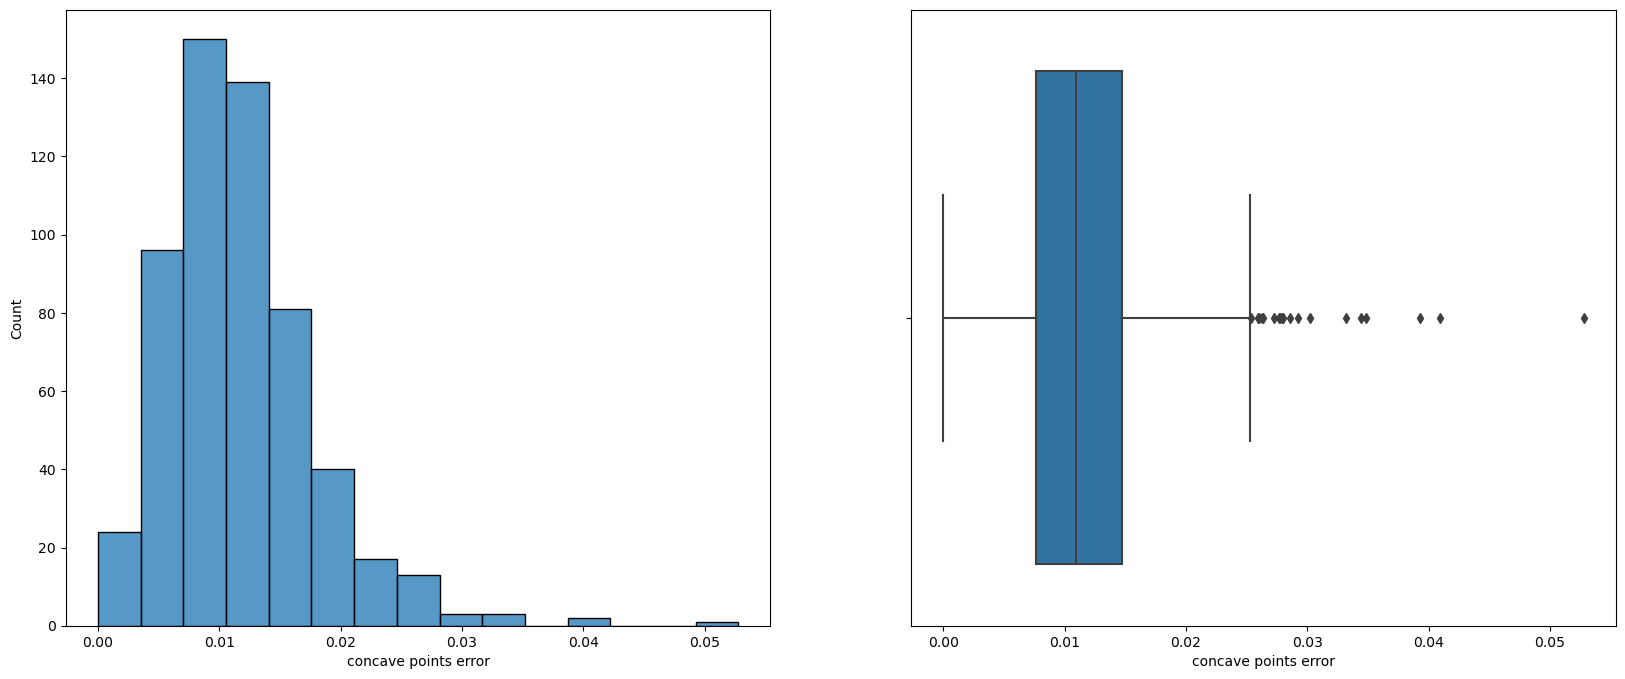

Histogram plot and Box plot:  symmetry error


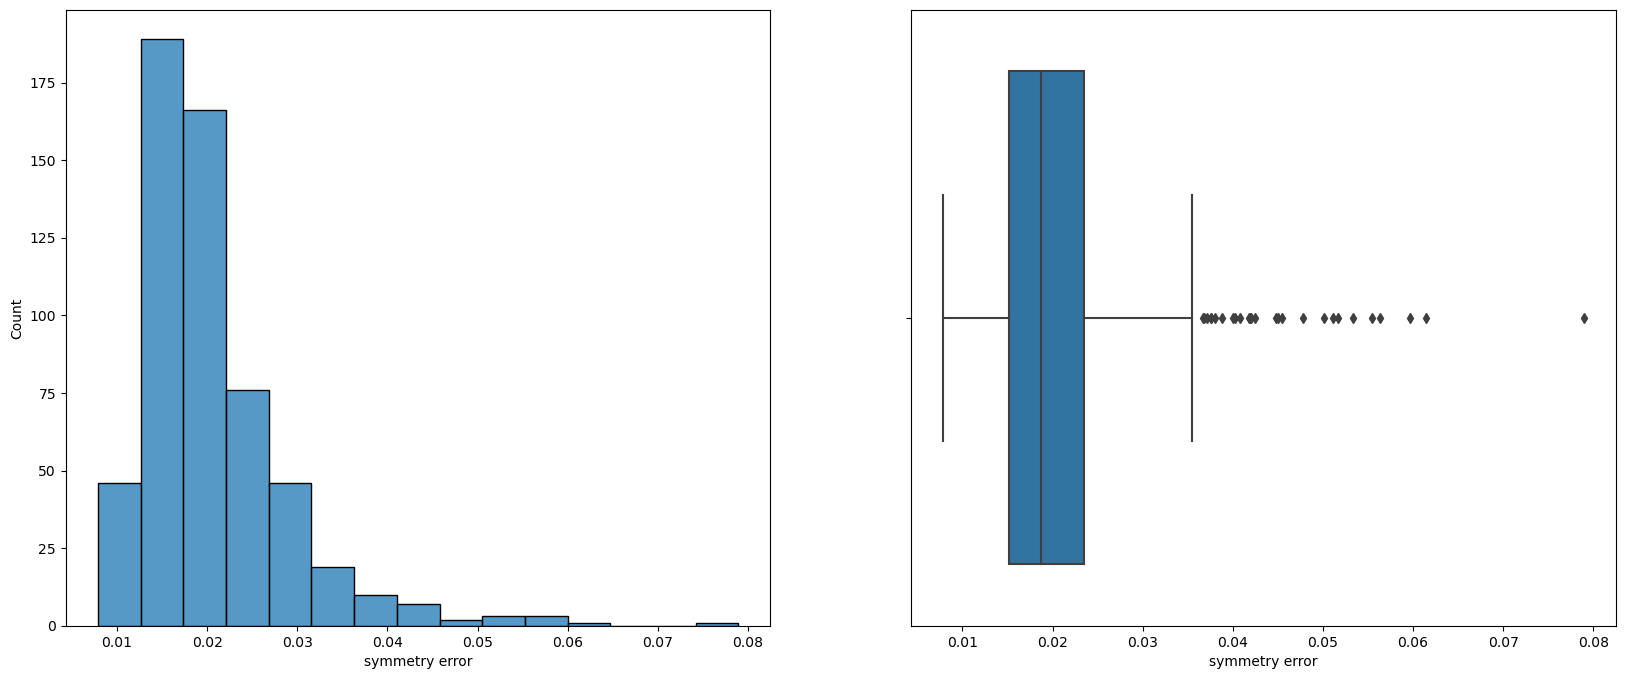

Histogram plot and Box plot:  fractal dimension error


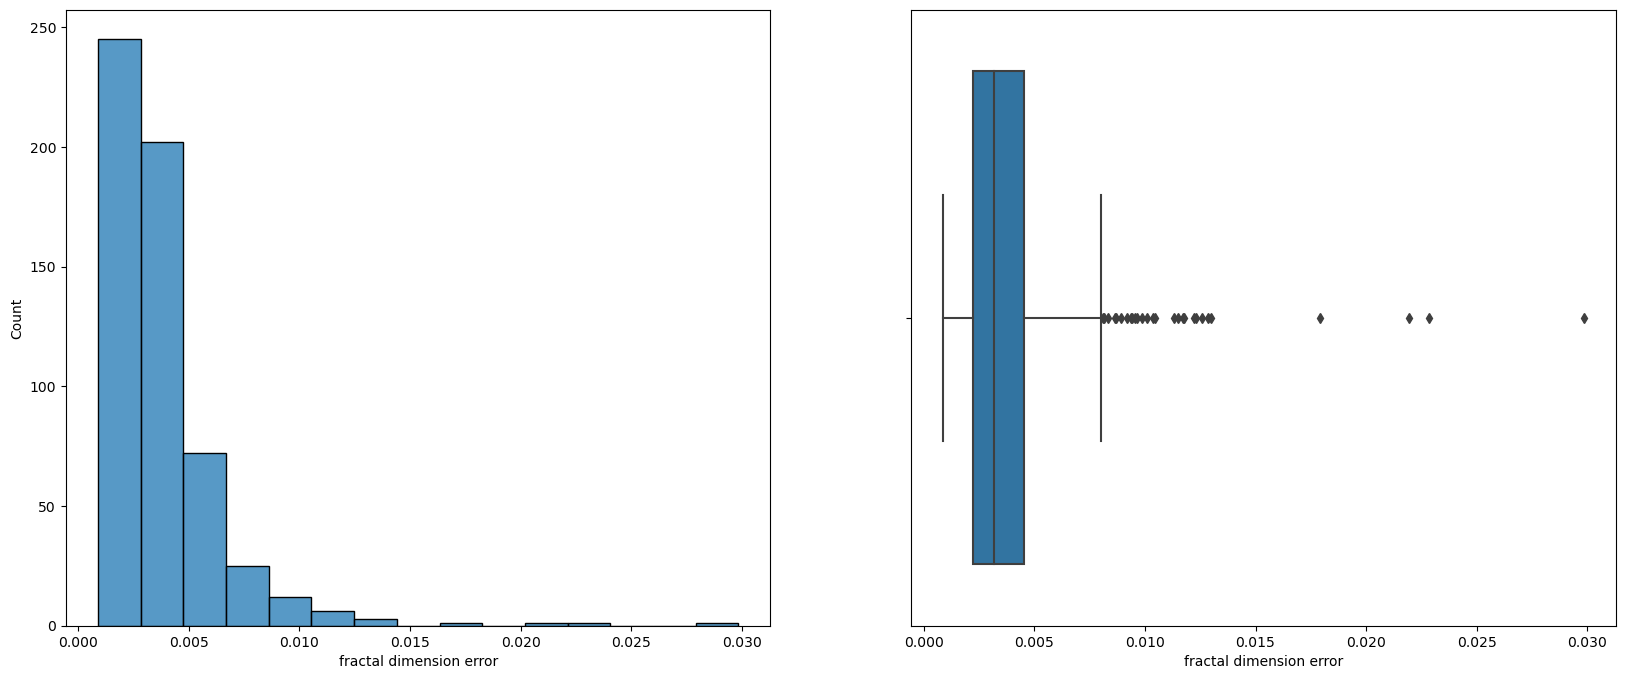

Histogram plot and Box plot:  worst radius


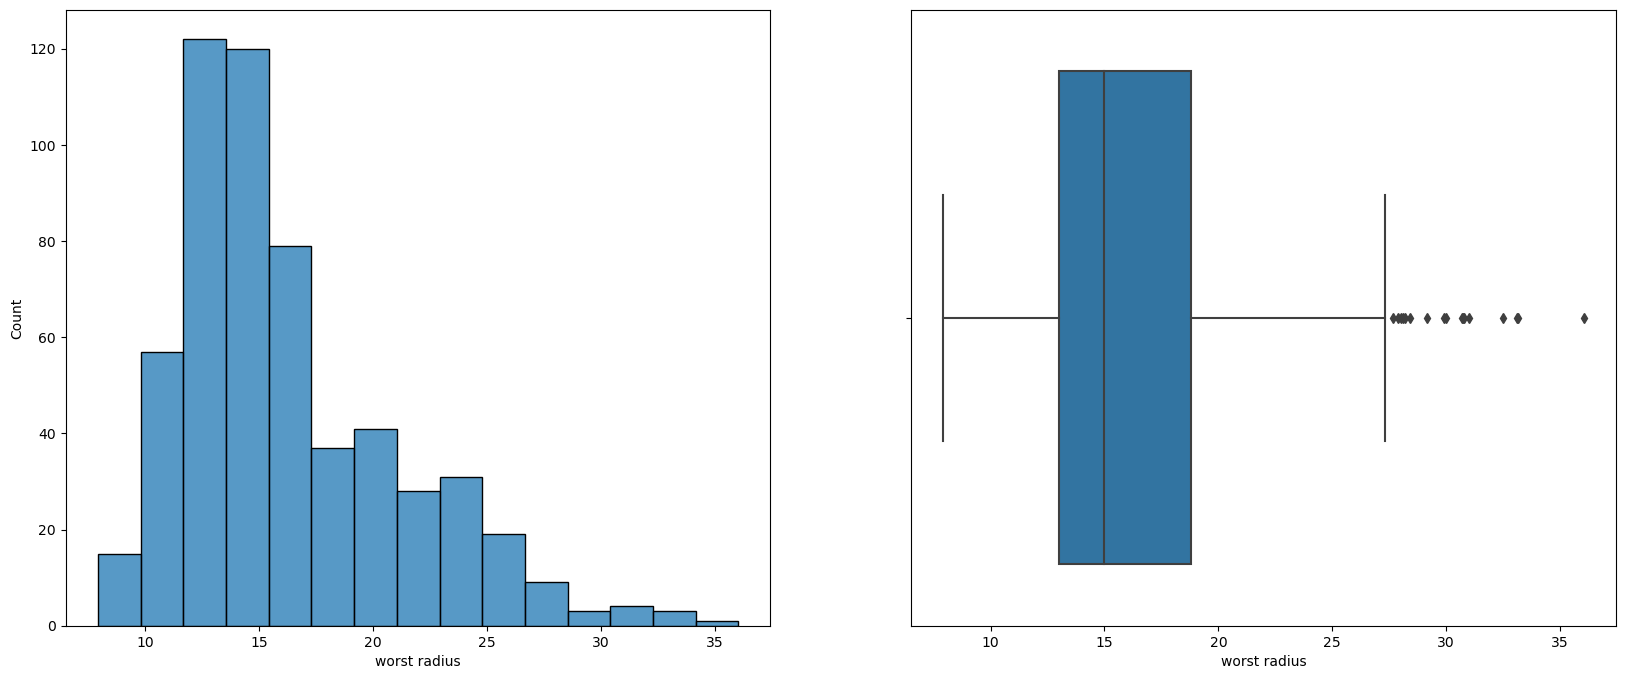

Histogram plot and Box plot:  worst texture


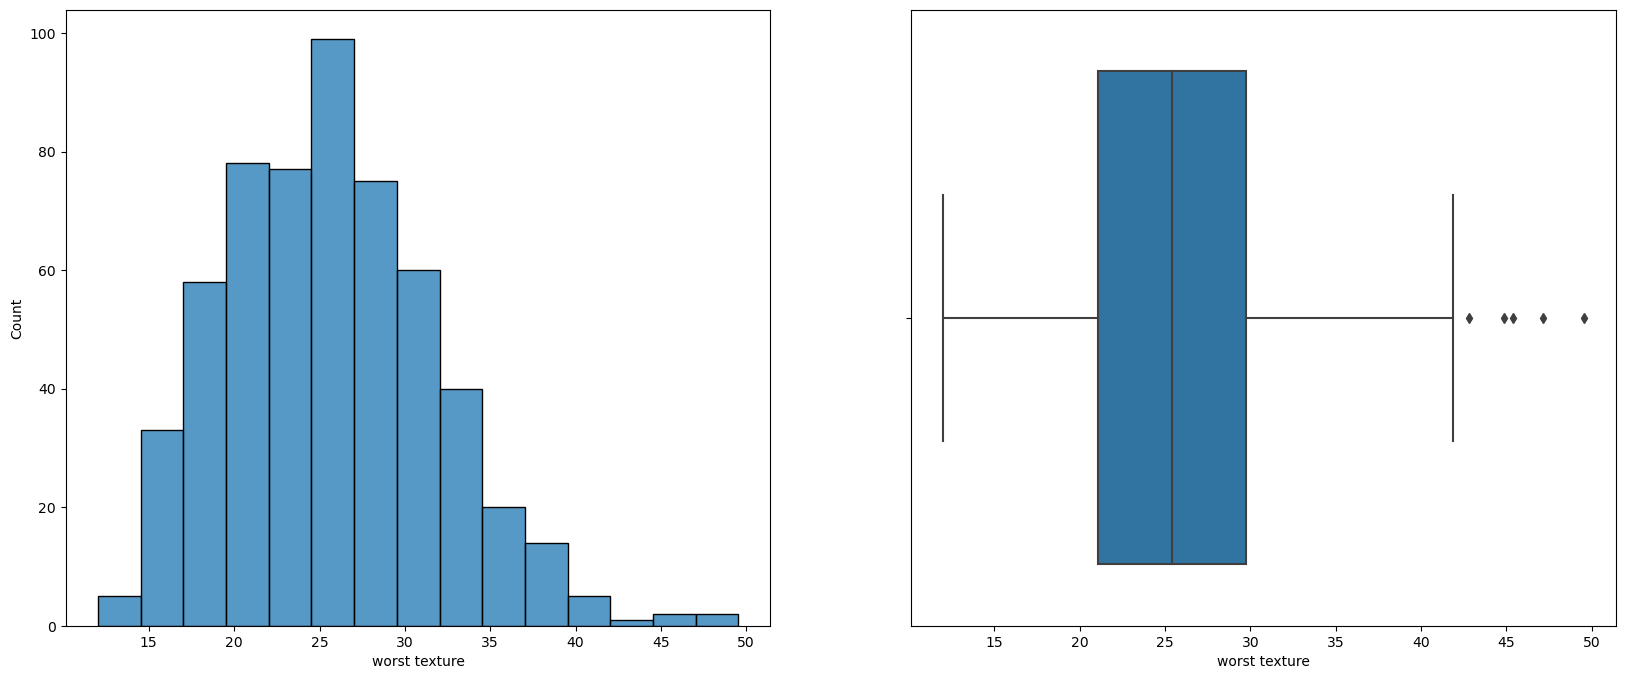

Histogram plot and Box plot:  worst perimeter


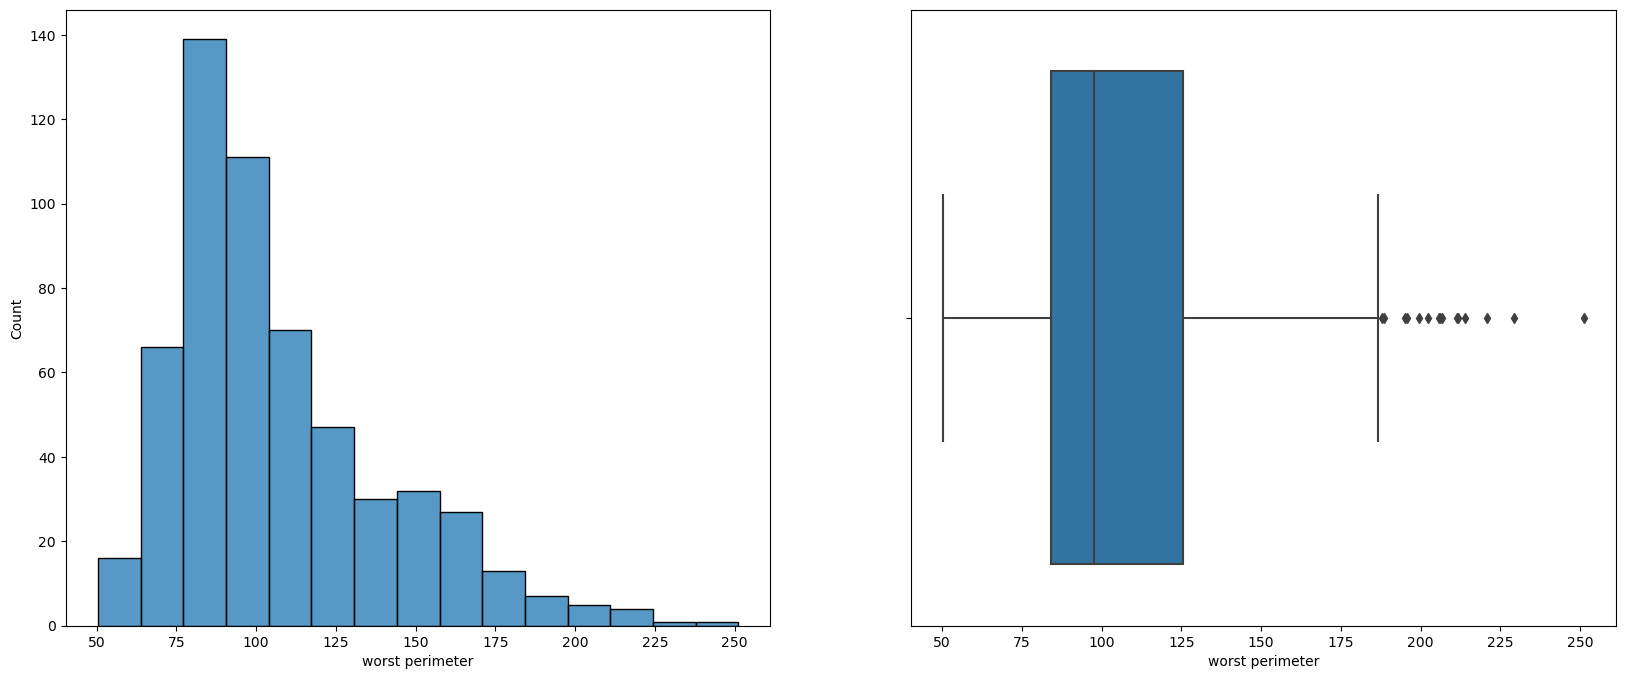

Histogram plot and Box plot:  worst area


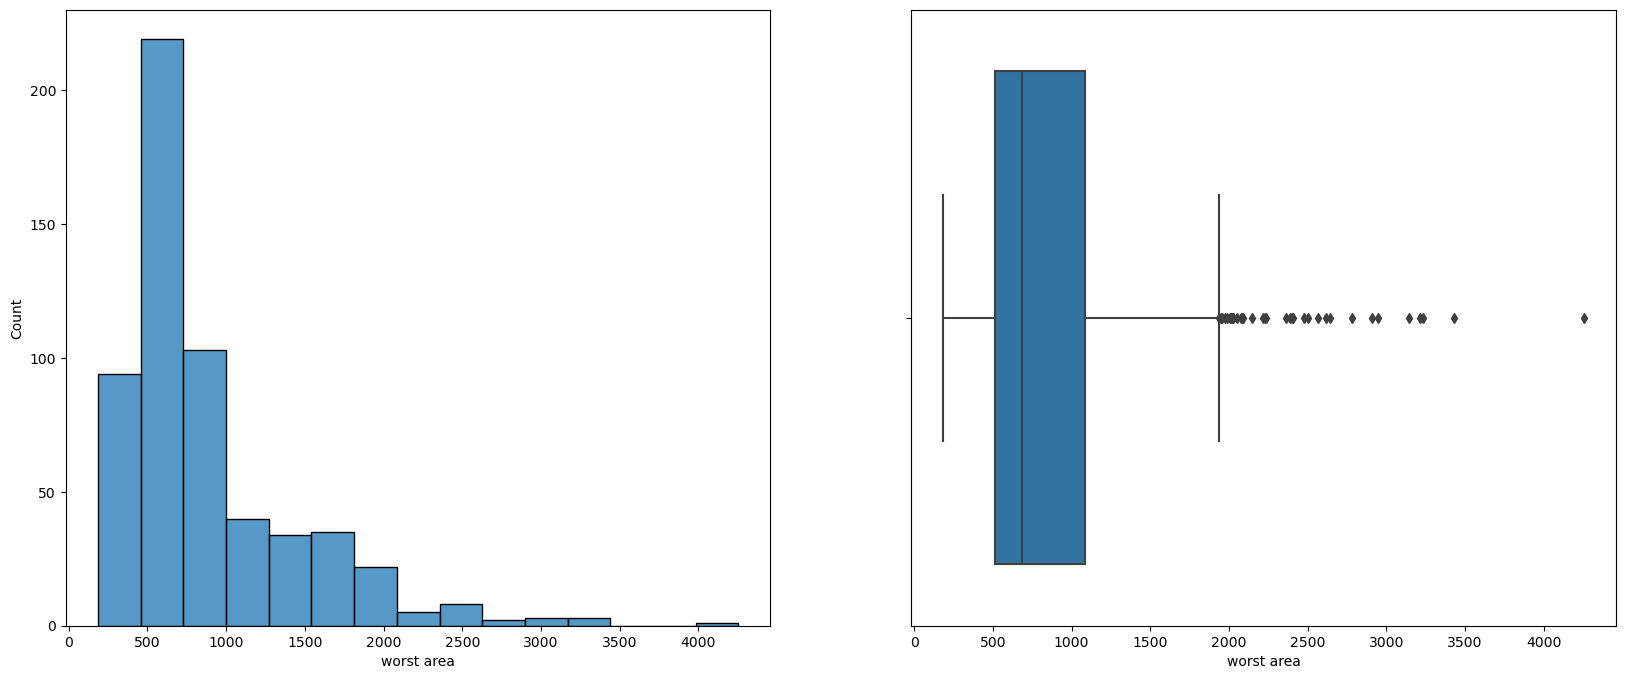

Histogram plot and Box plot:  worst smoothness


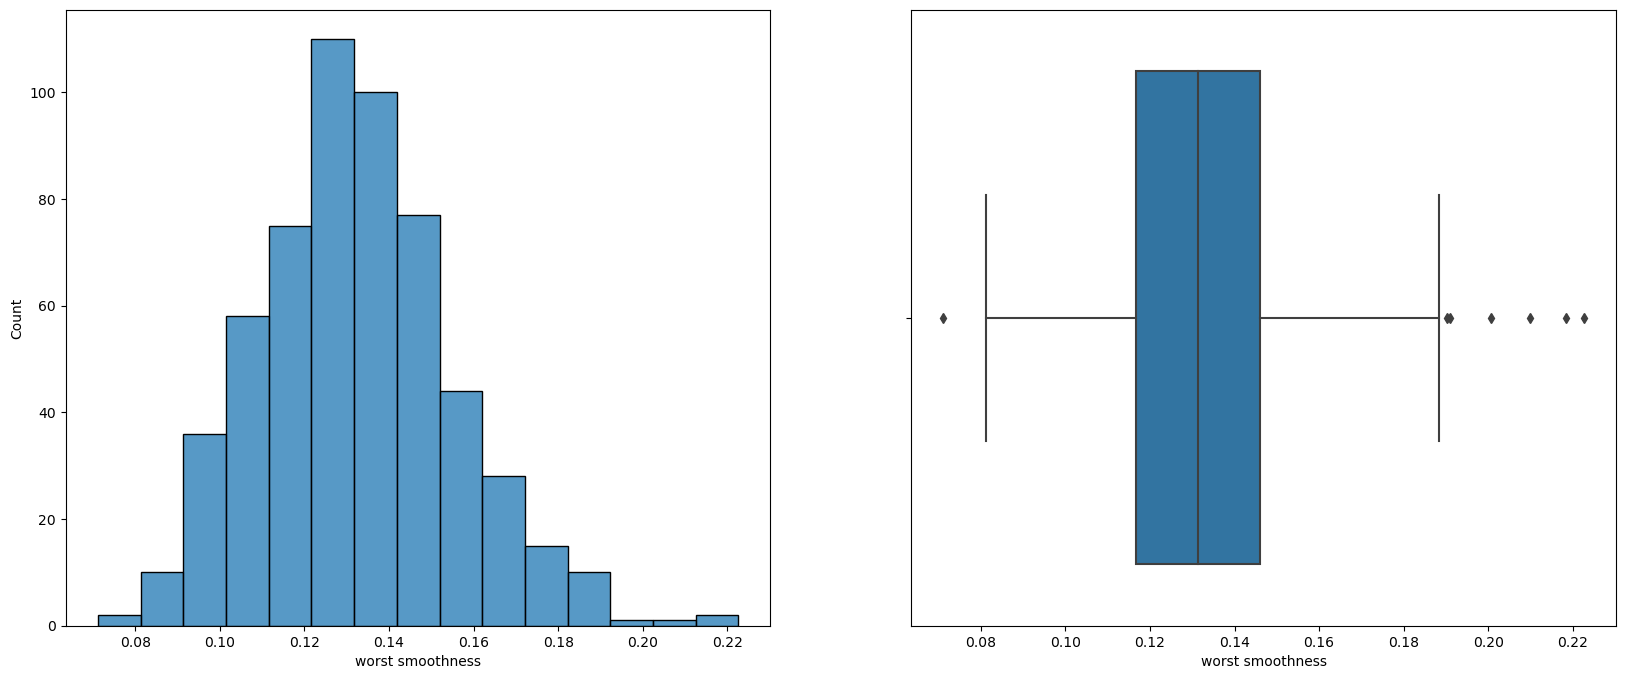

Histogram plot and Box plot:  worst compactness


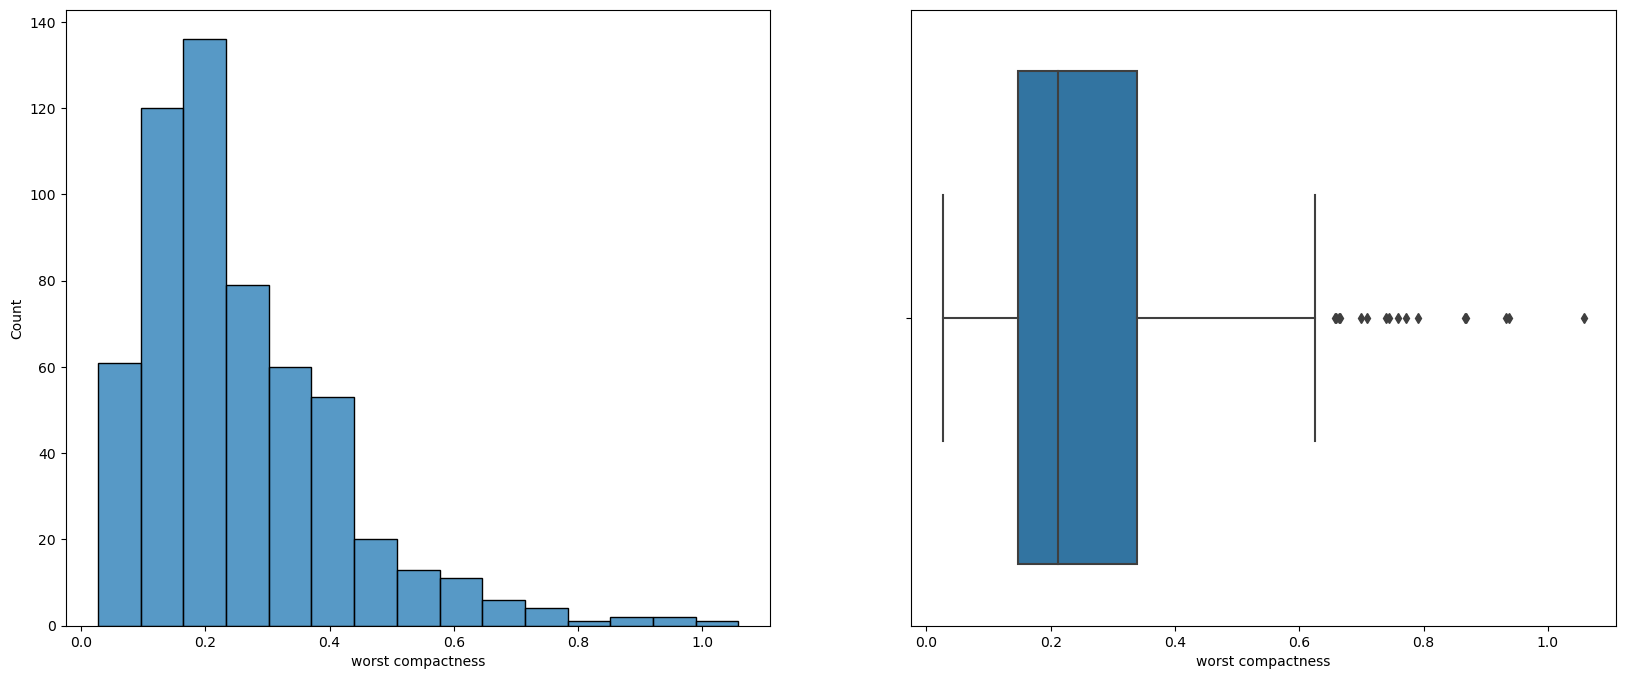

Histogram plot and Box plot:  worst concavity


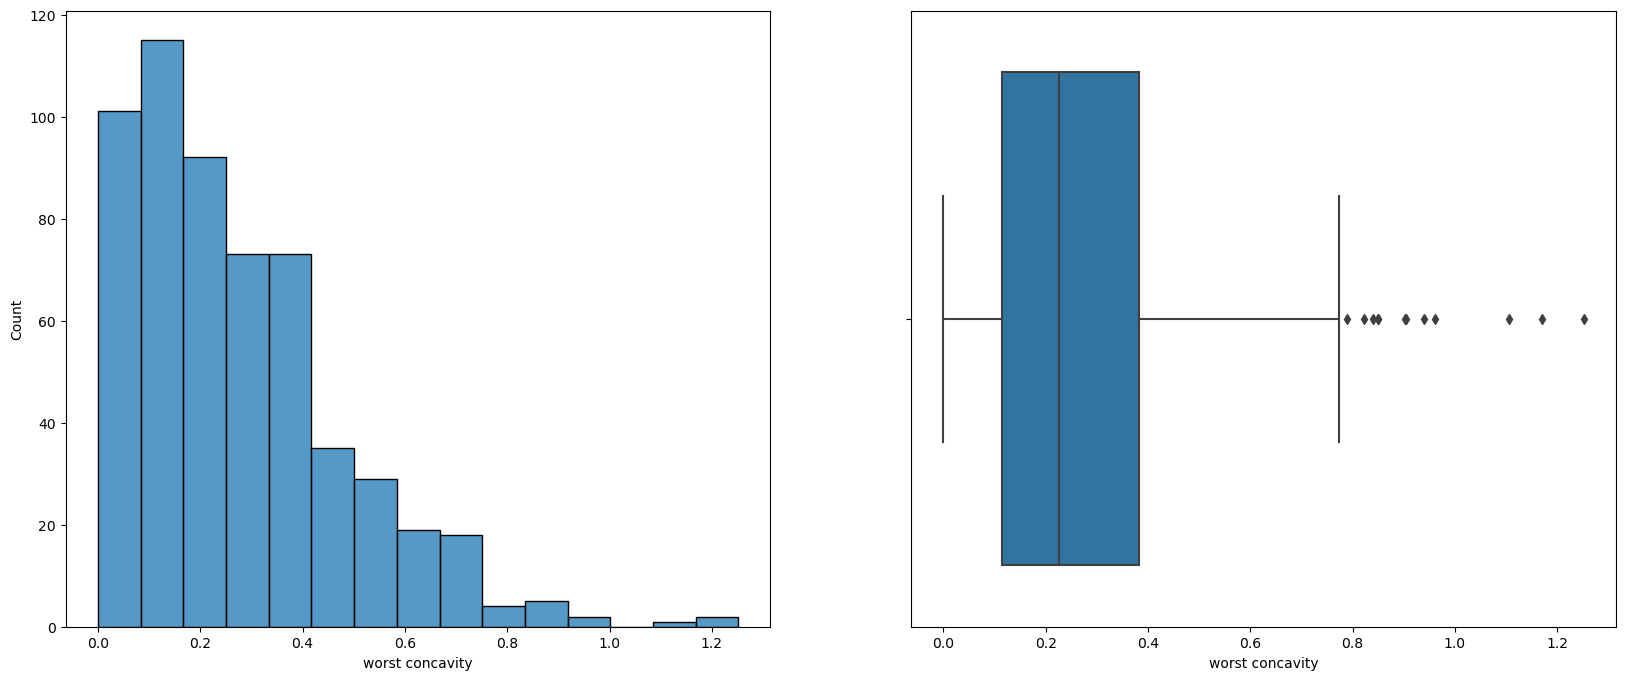

Histogram plot and Box plot:  worst concave points


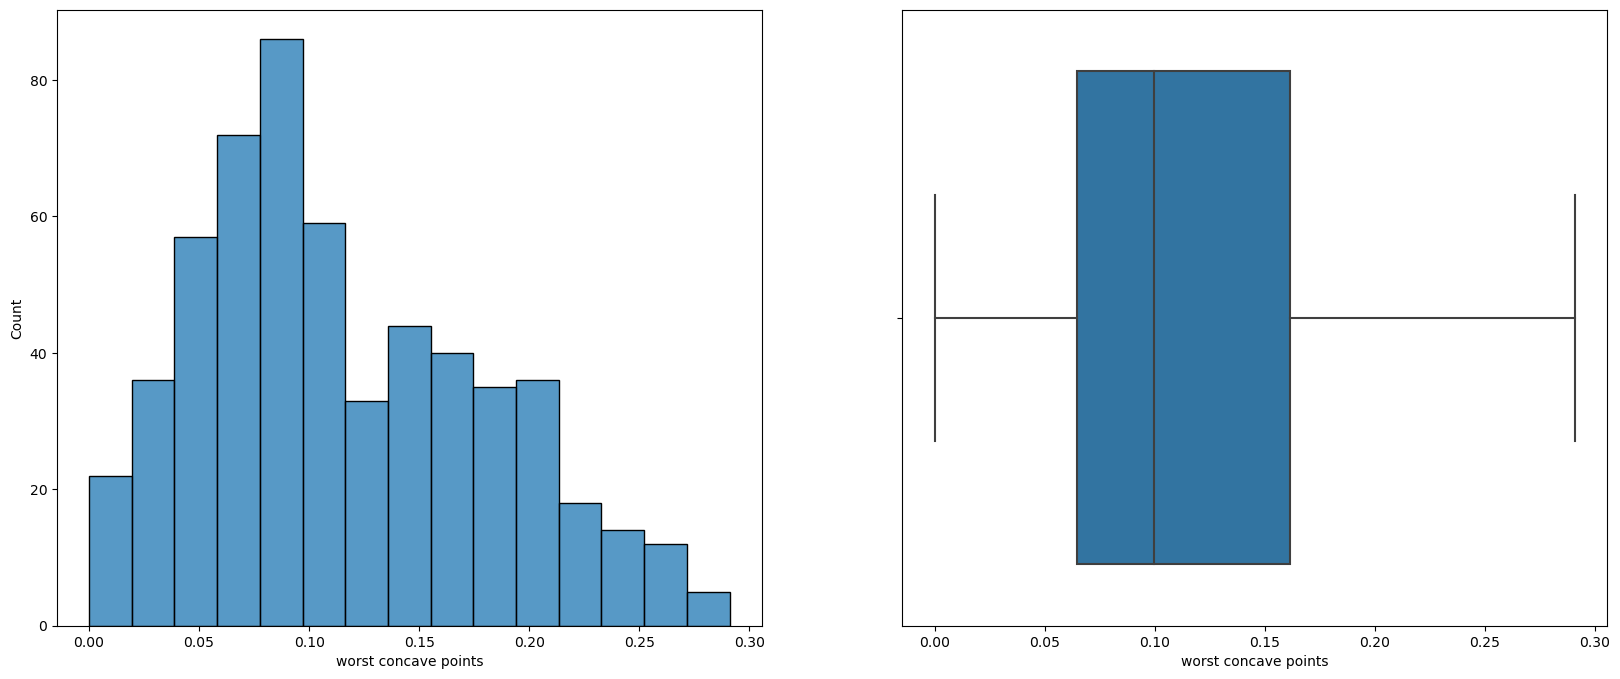

Histogram plot and Box plot:  worst symmetry


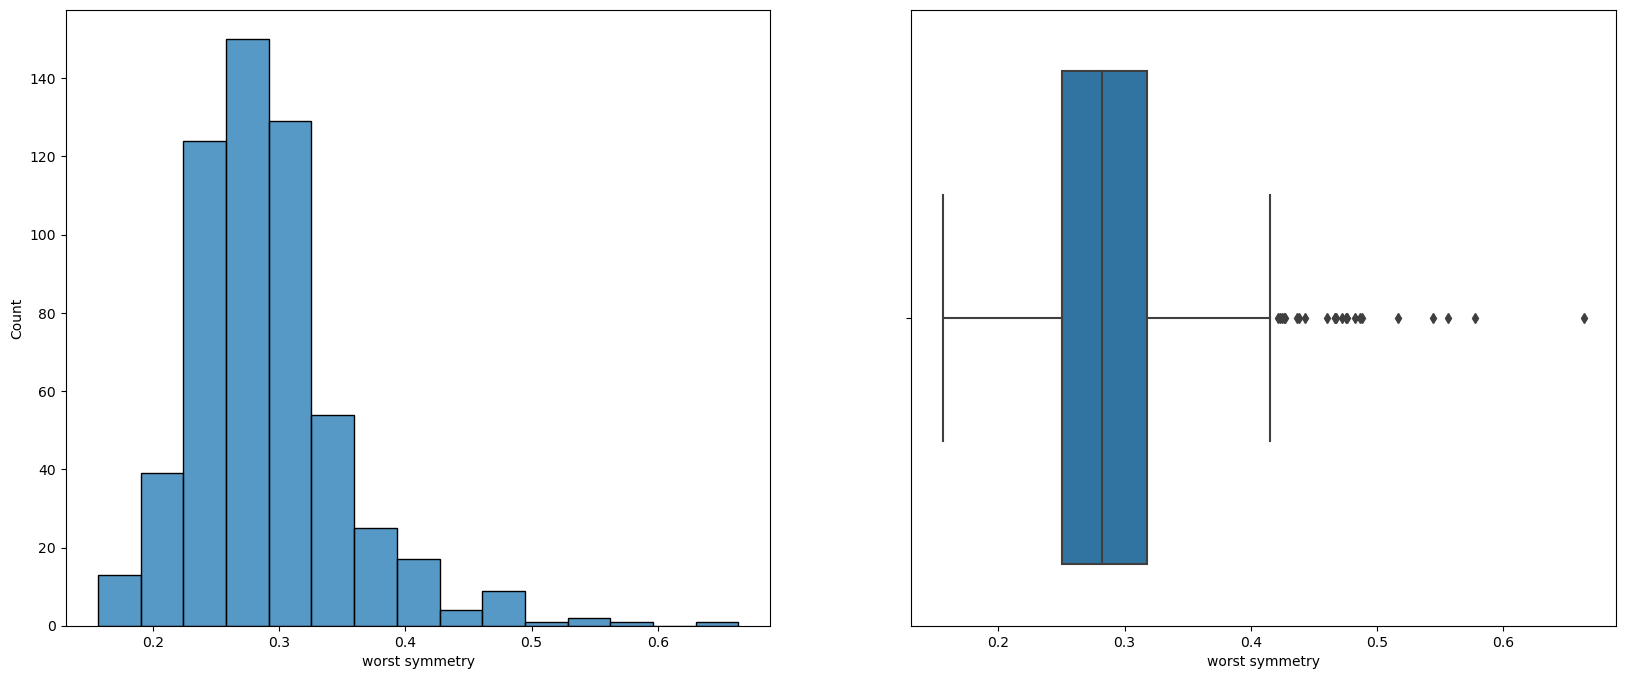

Histogram plot and Box plot:  worst fractal dimension


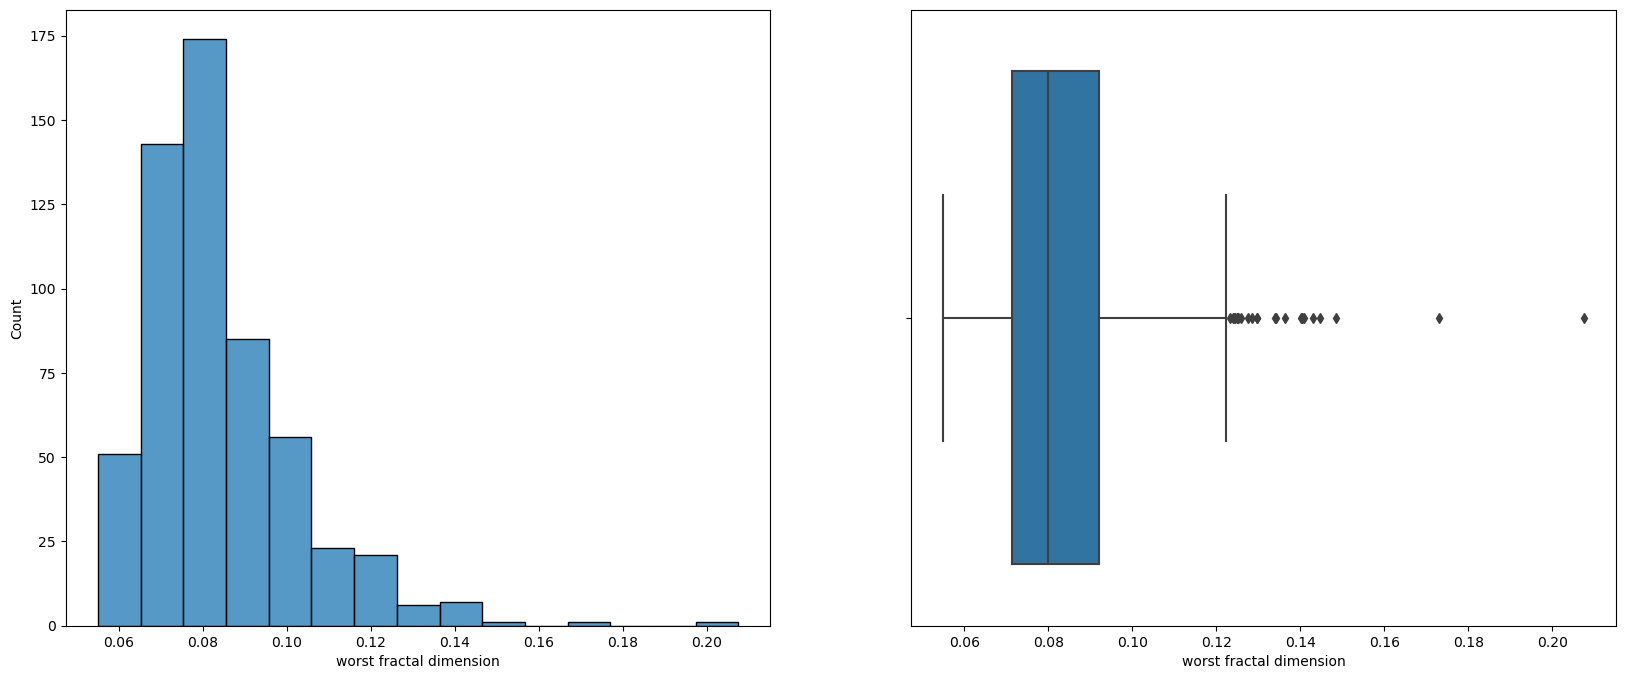

In [16]:
## Plotting the histogram and boxplot plots for all the numerical columns

# Getting the list of numerical/float columns except the target column 'target'
list_num_cols = list(df.columns[:-1])

# A for loop to create histogram and boxplot plots for each of the columns in 'list_num_cols'
for col in list_num_cols:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(df[col], ax=ax1, bins = 15)
    sns.boxplot(x = df[col], ax = ax2)
    plt.show()

In [17]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

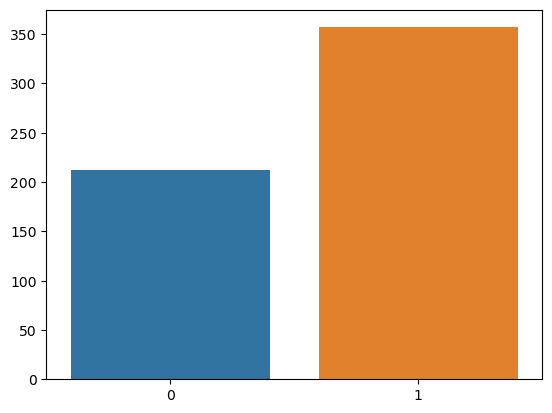

In [18]:
sns.barplot(x = df.target.value_counts().index, y = df.target.value_counts().values)
plt.show()

In [19]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<AxesSubplot:xlabel='mean radius', ylabel='Count'>

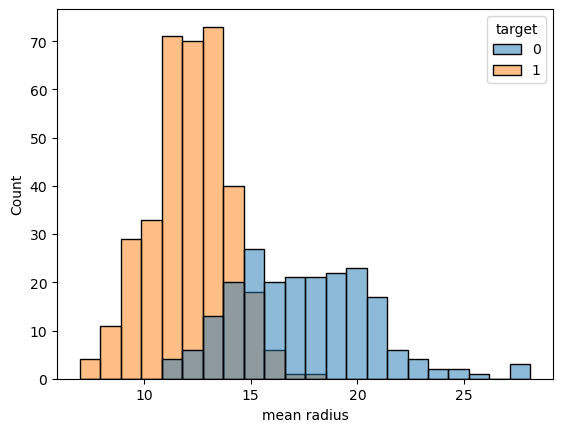

In [20]:
# Column: mean radius
sns.histplot(data = df, x = "mean radius", hue = "target")

<AxesSubplot:xlabel='mean texture', ylabel='Count'>

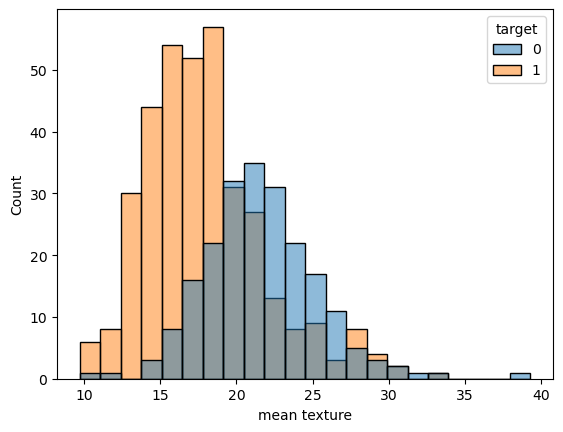

In [21]:
# Column: mean texture
sns.histplot(data = df, x = "mean texture", hue = "target")

Histogram plot:  mean radius


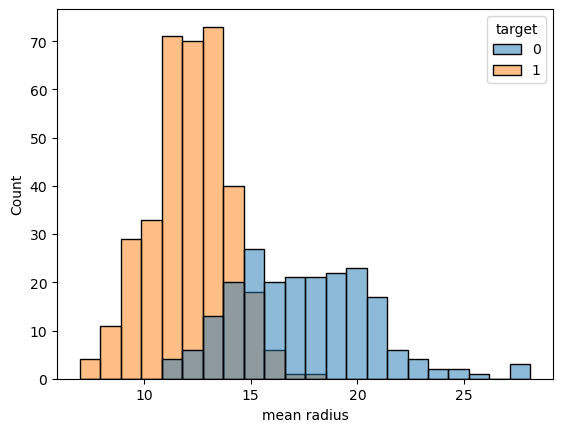

Histogram plot:  mean texture


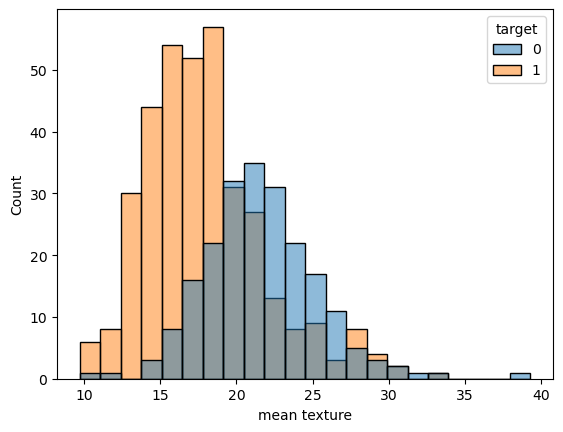

Histogram plot:  mean perimeter


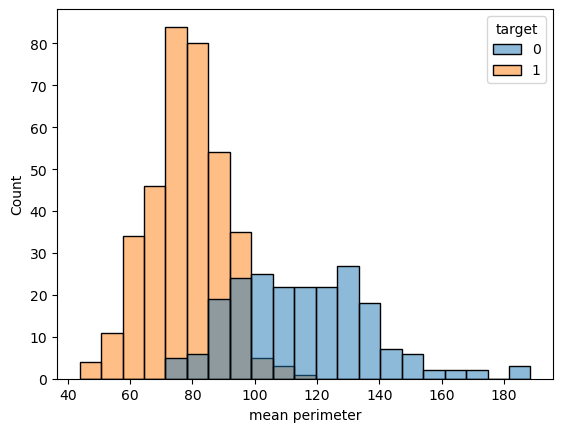

Histogram plot:  mean area


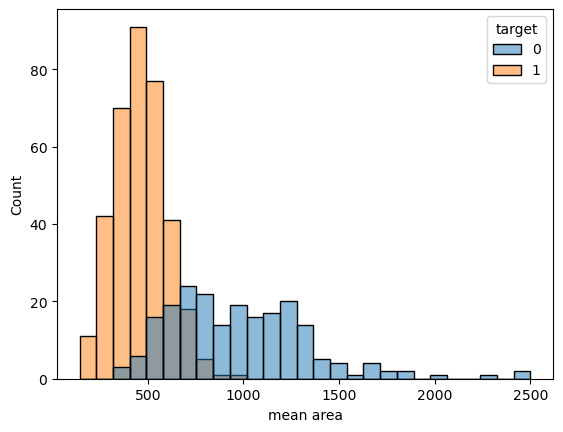

Histogram plot:  mean smoothness


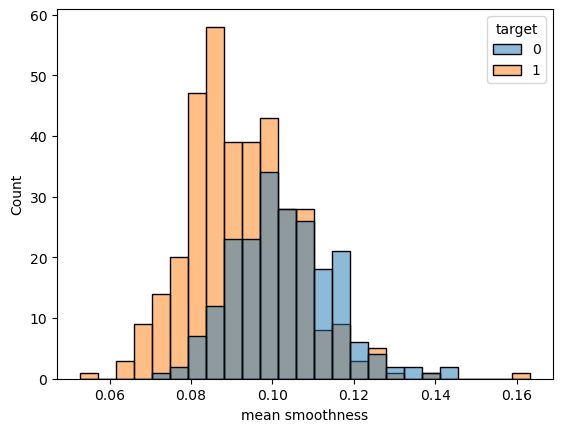

Histogram plot:  mean compactness


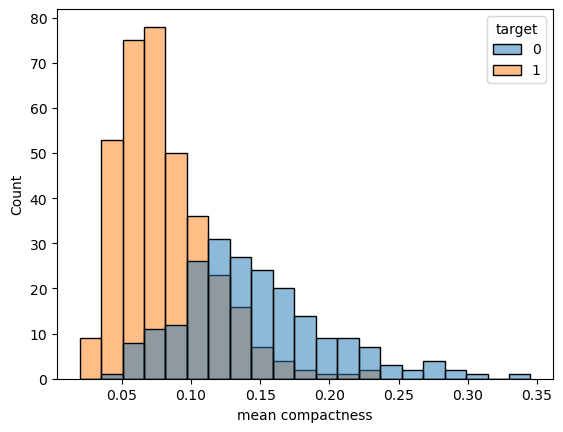

Histogram plot:  mean concavity


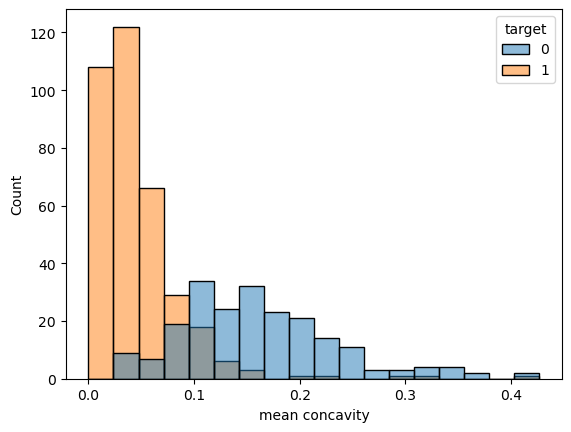

Histogram plot:  mean concave points


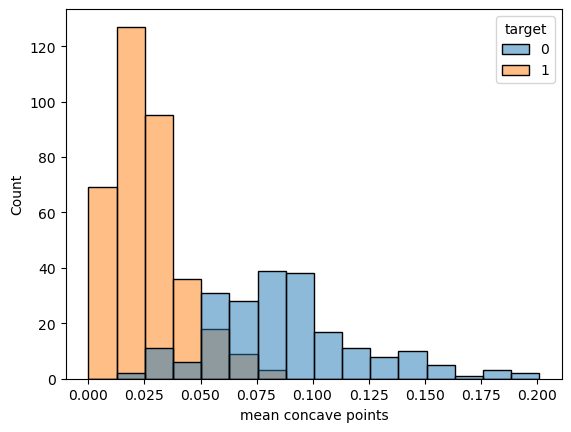

Histogram plot:  mean symmetry


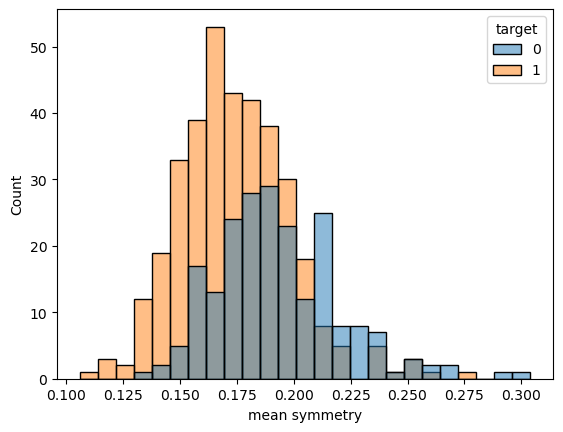

Histogram plot:  mean fractal dimension


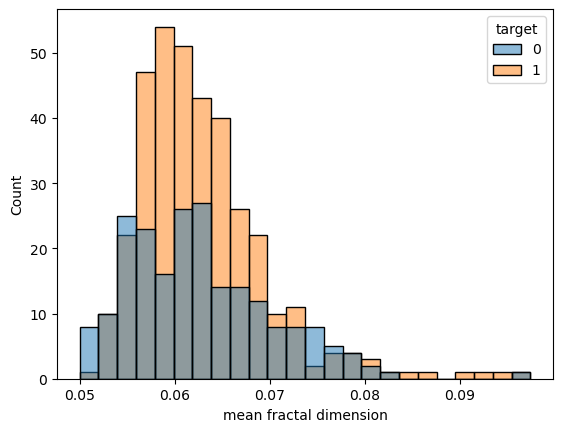

Histogram plot:  radius error


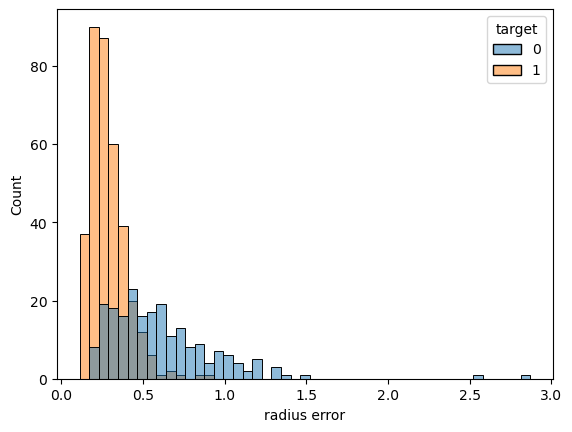

Histogram plot:  texture error


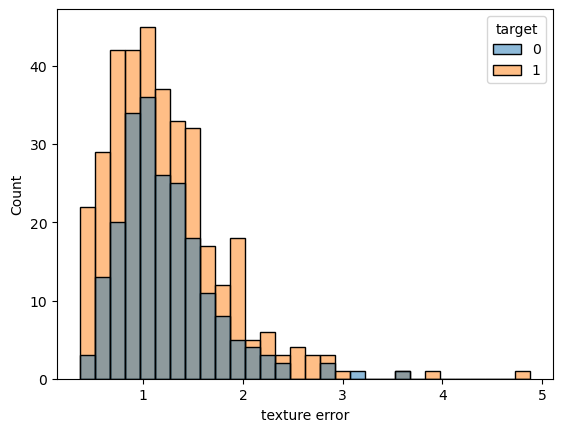

Histogram plot:  perimeter error


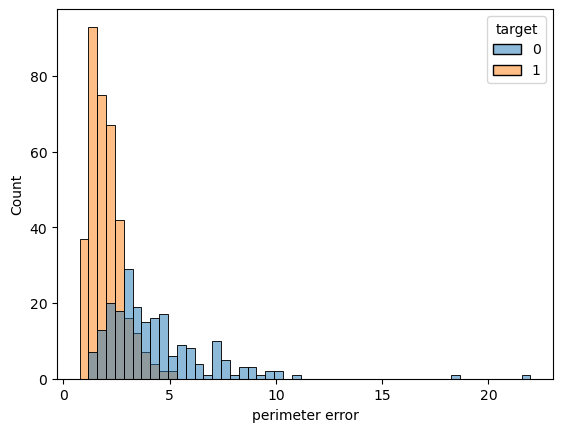

Histogram plot:  area error


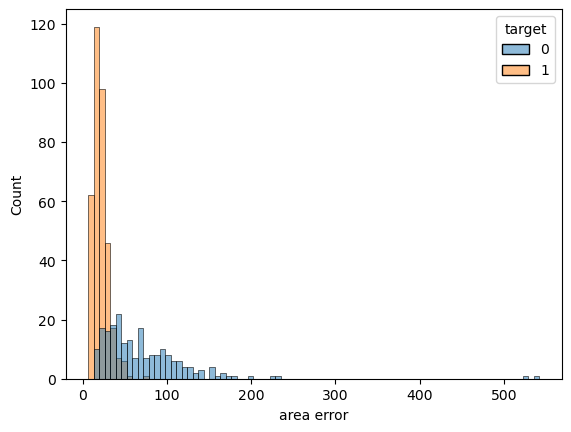

Histogram plot:  smoothness error


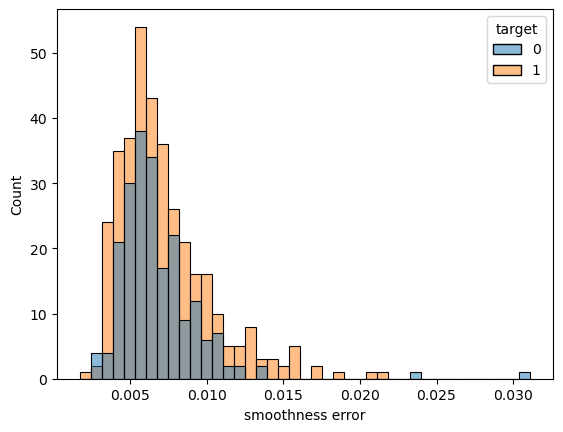

Histogram plot:  compactness error


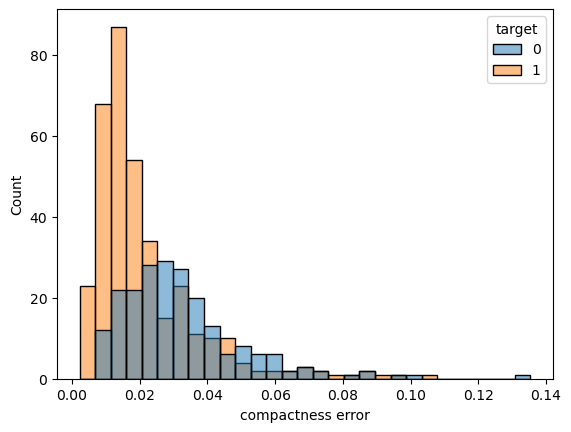

Histogram plot:  concavity error


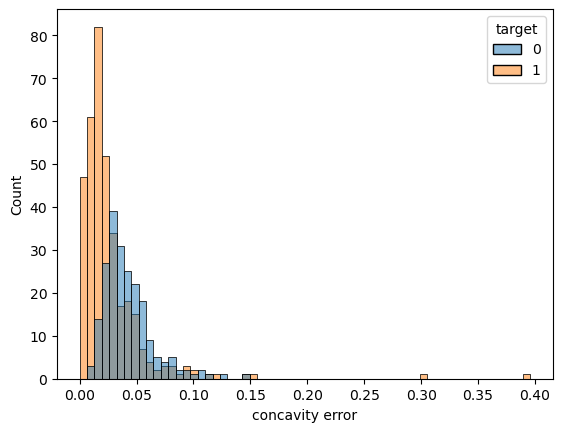

Histogram plot:  concave points error


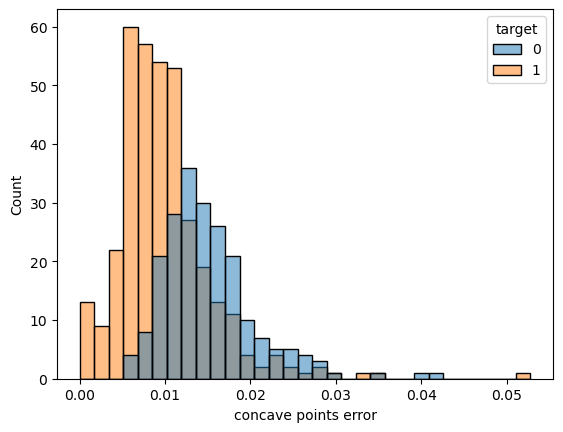

Histogram plot:  symmetry error


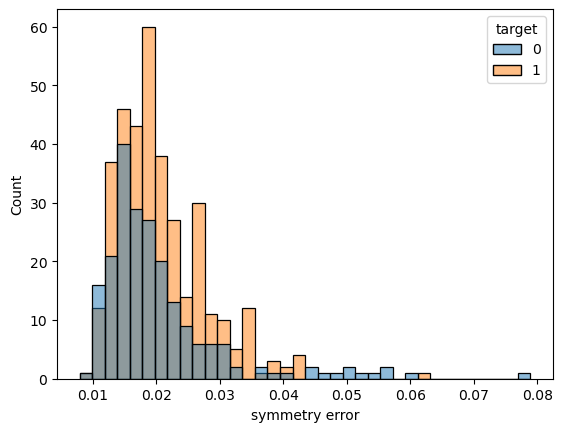

Histogram plot:  fractal dimension error


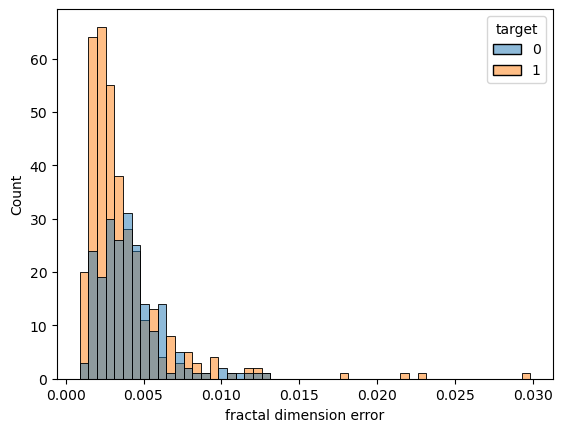

Histogram plot:  worst radius


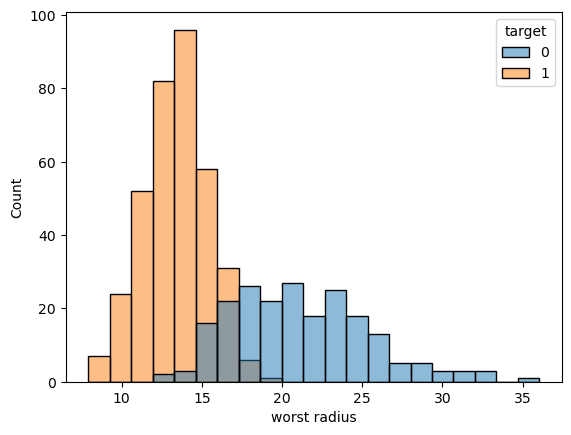

Histogram plot:  worst texture


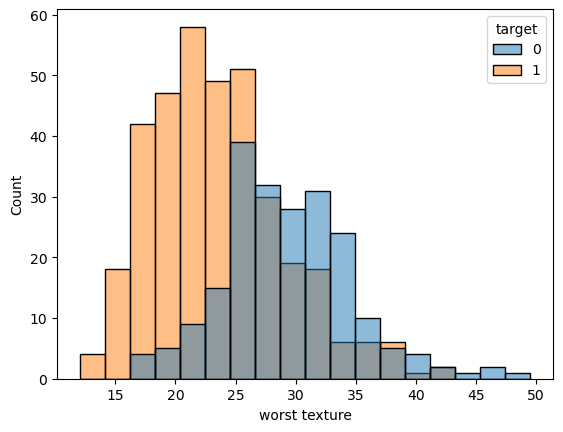

Histogram plot:  worst perimeter


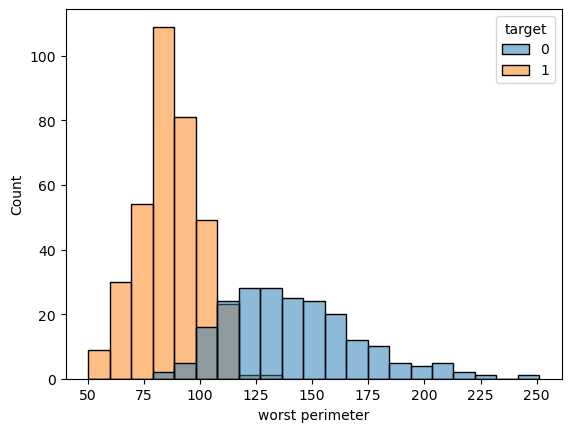

Histogram plot:  worst area


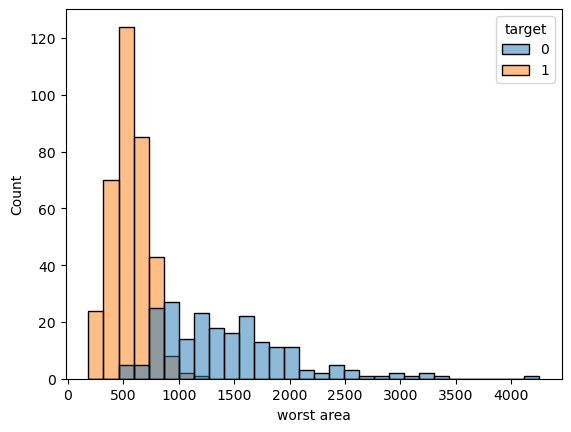

Histogram plot:  worst smoothness


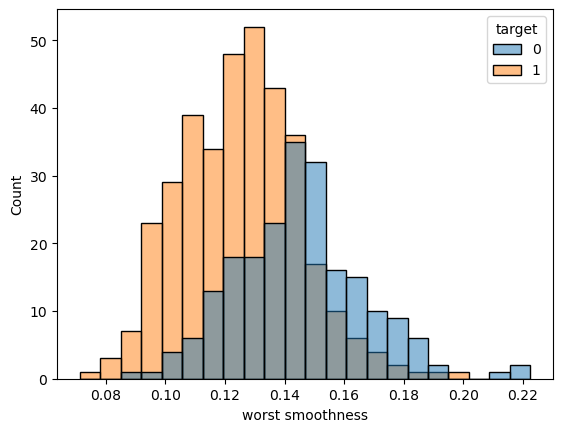

Histogram plot:  worst compactness


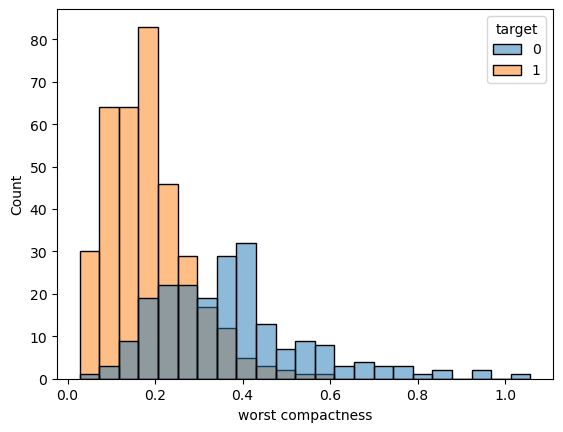

Histogram plot:  worst concavity


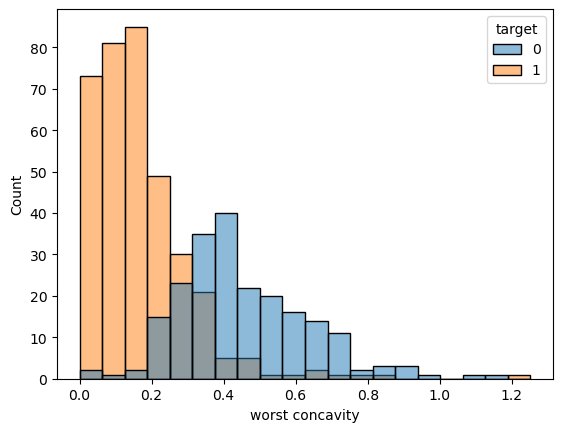

Histogram plot:  worst concave points


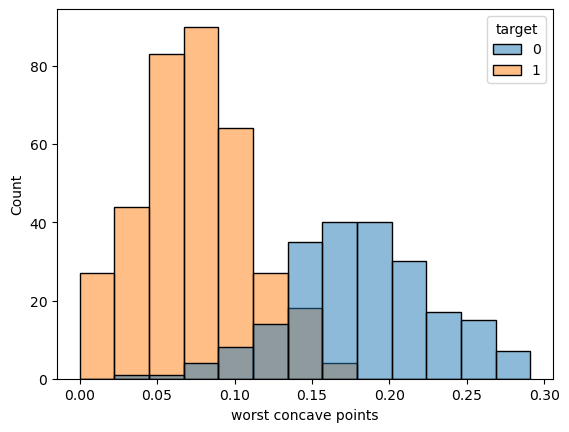

Histogram plot:  worst symmetry


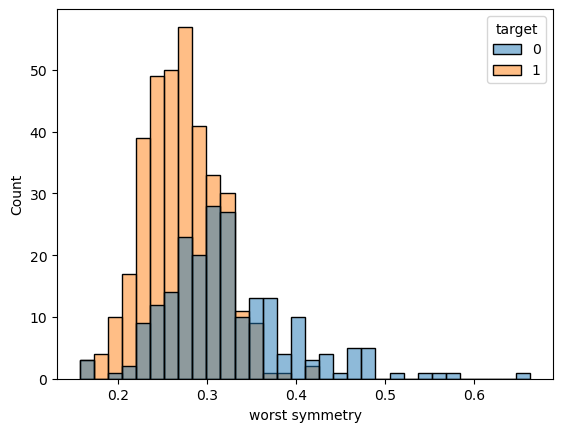

Histogram plot:  worst fractal dimension


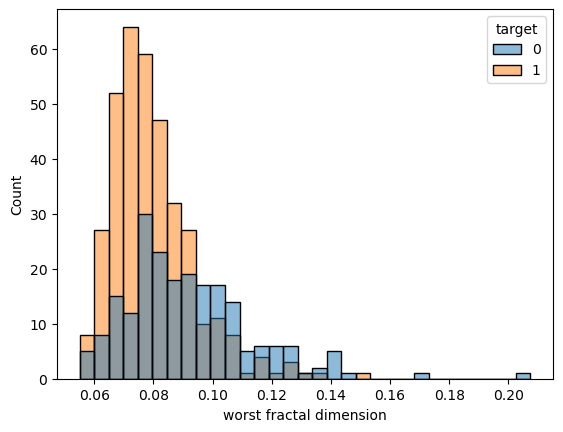

In [22]:
## Plotting the overlapping histograms between the numerical features and the target

# Getting the list of numerical/float columns except the target column 'target'
list_num_cols = list(df.columns[:-1])

# A for loop to create the overlapping histograms
for col in list_num_cols:
    print("Histogram plot: ", col)
    sns.histplot(data = df, x = col, hue = "target")
    plt.show()

# Feature Engineering 

<AxesSubplot:>

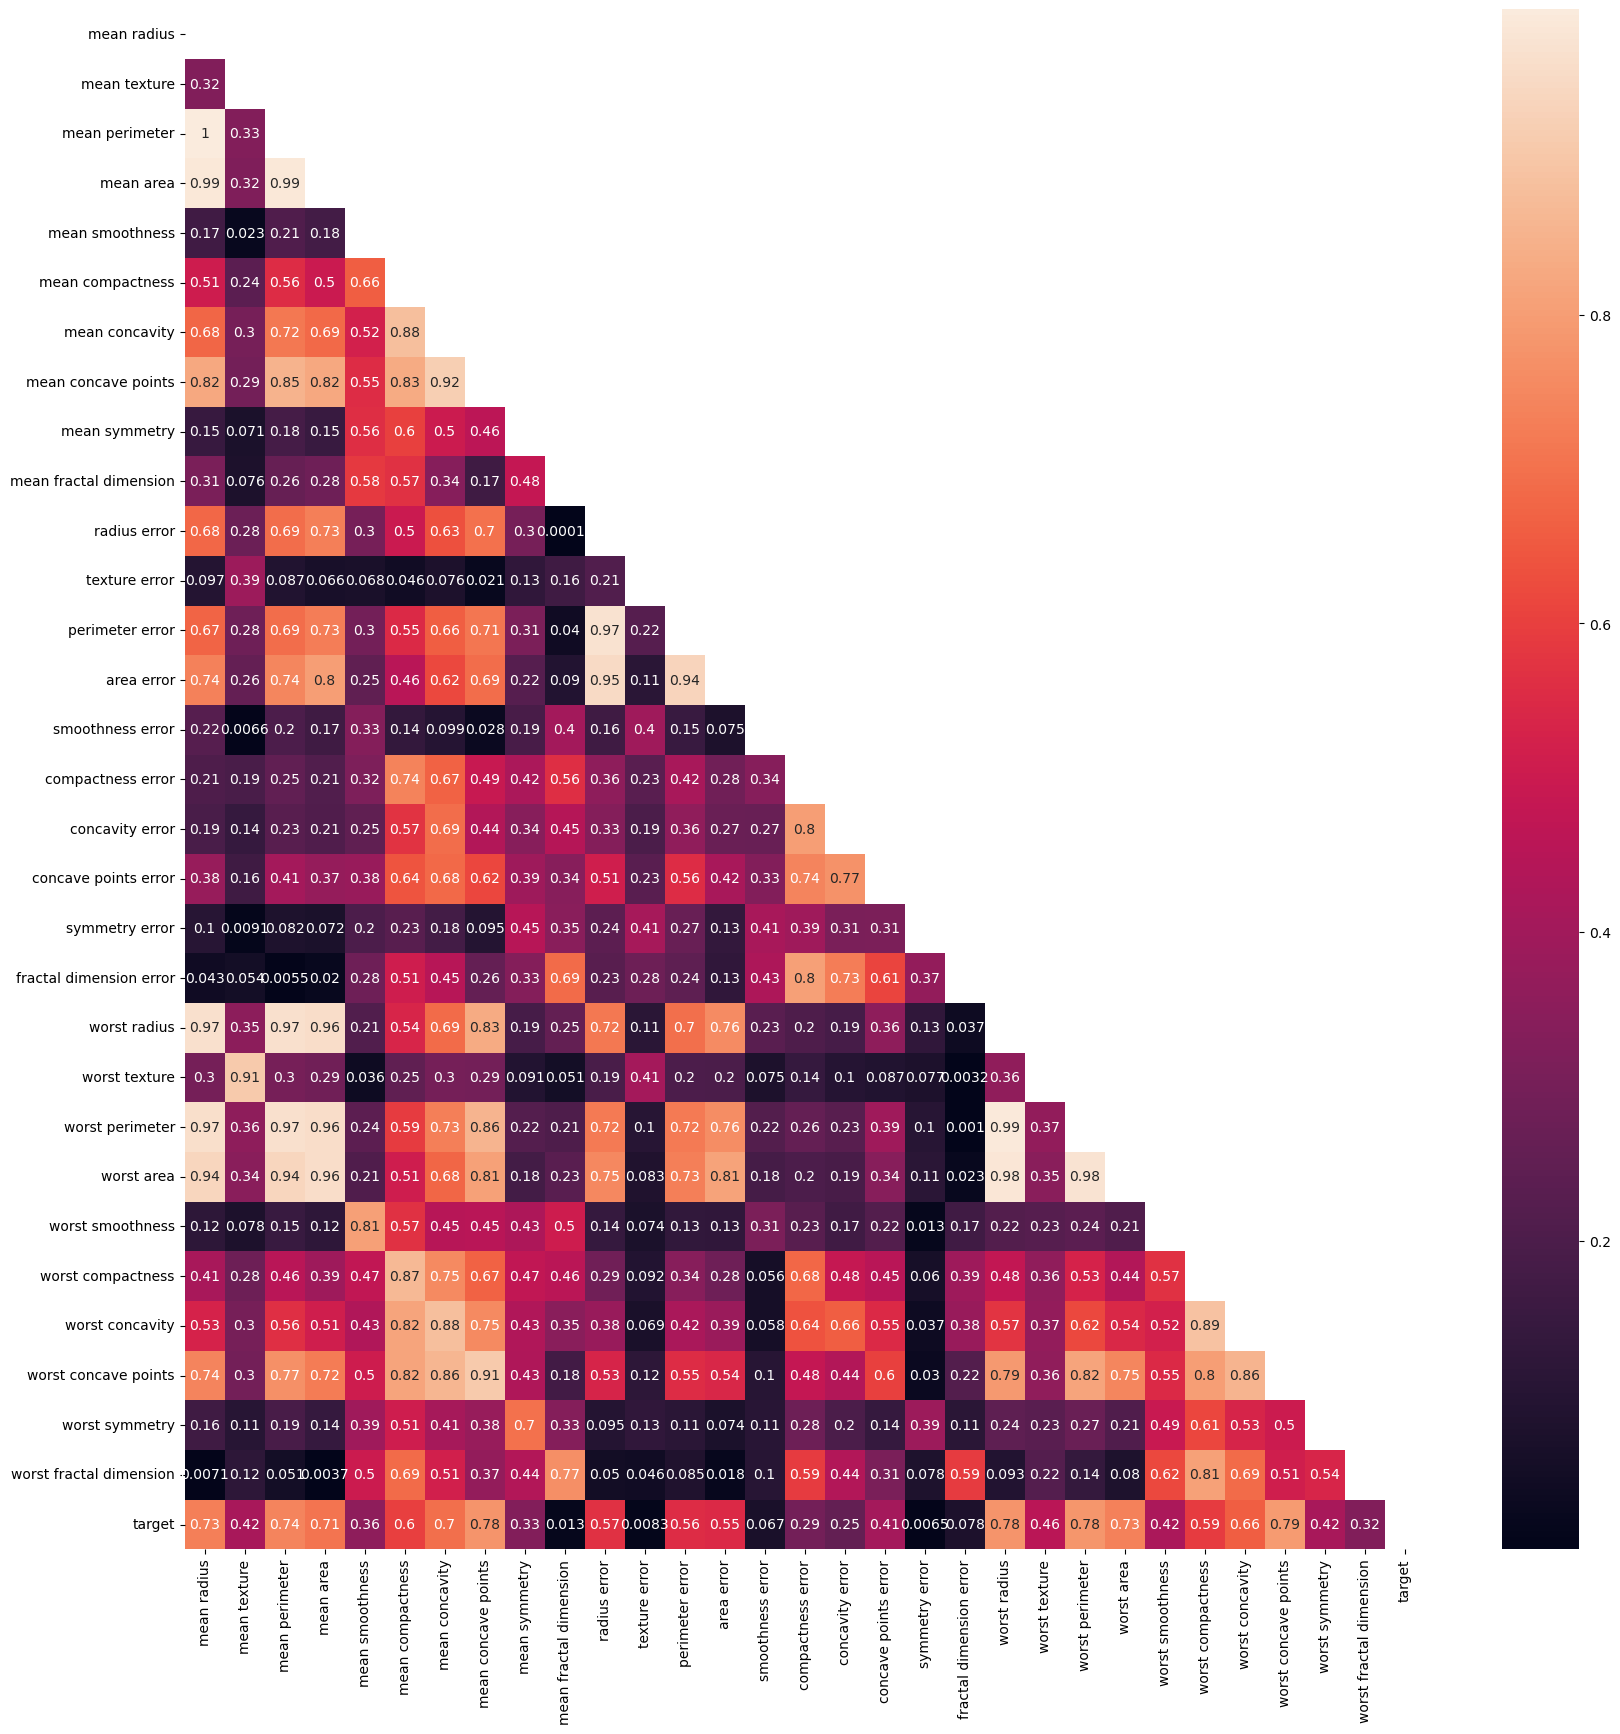

In [23]:
# Checking the correlations between the columns (features and target)

corr = df.corr().abs()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True, mask = mask)

<AxesSubplot:>

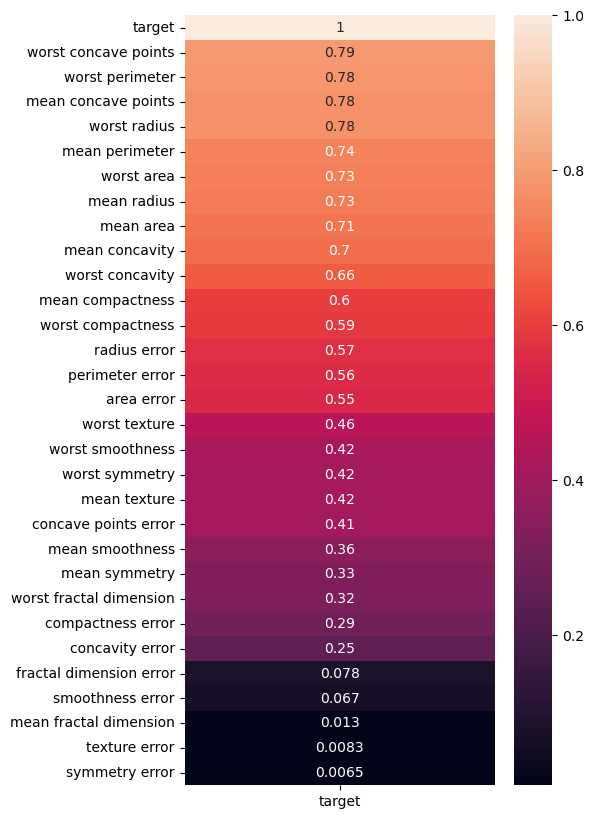

In [24]:
# Get only the correlations with the target column
plt.figure(figsize=(5,10))
sns.heatmap(df.corr().abs()[['target']].sort_values(by = 'target', ascending = False), annot = True)

In [25]:
df.corr().abs()['target'].sort_values()

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

Models Developments [Logistic Regression and Decision Trees]

In [26]:
# Defining the features and the target
features = df.drop(columns = ['target'])
target = df.target

In [27]:
# Splitting the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [28]:
## Logistic Regerssion
# Initializing the LogisticRegression model
LR_model = LogisticRegression(max_iter = 3000)
# Training the model, by fitting the data to it
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [29]:
# Getting the LogisticRegression predictions on the test set (unseen data)
LR_predictions = LR_model.predict(X_test)

In [30]:
# Printing the classification report (actual values vs. predictions)
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        66
           1       0.92      0.97      0.94       105

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



<AxesSubplot:>

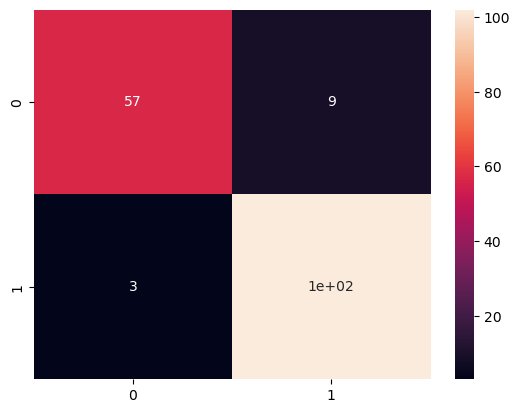

In [31]:
# Showing the confusion matrix
sns.heatmap(confusion_matrix(y_test, LR_predictions), annot = True)

In [32]:
## Decision Trees
# Initializing the Decision Tree model
DT_model = DecisionTreeClassifier()
# Training the model, by fitting the data to it
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Getting the Decision Tree predictions on the test set (unseen data)
DT_predictions = DT_model.predict(X_test)

In [34]:
# Printing the classification report (actual values vs. predictions)
print(classification_report(y_test, DT_predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.96      0.91      0.94       105

    accuracy                           0.92       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



<AxesSubplot:>

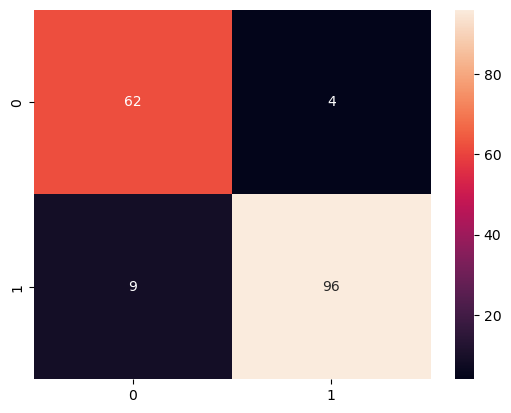

In [35]:
# Showing the confusion matrix
sns.heatmap(confusion_matrix(y_test, DT_predictions), annot = True)